<a href="https://colab.research.google.com/github/Katla19/Netflix-DEA/blob/main/netflix_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data set link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

## ** Defining Problem Statement and Analysing basic metrics **

1.Overview of the dataset

In [ ]:
n=pd.read_csv('netflix.csv')
n.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
n.shape  #Observations on the shape of data

(8807, 12)

In [ ]:
n.info()   #data types of all the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print(n.head(3))

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                

In this dataset, the following information is available:

*   Show id for internal reference
*   A type identifier specifying whether the content is a movie or a TV show.
*   The titles of the movies or TV shows.
*   The names of the directors.
*   The list of actors featured.
*   The country where the content was produced.
*   The date when the content was added to Netflix.
*   The actual release year of the movie or TV show.
*   The ratings assigned to the content.
*   The total duration, either in minutes (for movies) or the number of seasons (for TV shows).
*   The genre of the content.
*   The disctription as a small insight of the content



In [ ]:
nf = n.select_dtypes(include='number')
nf.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


2.Missing data

<Axes: >

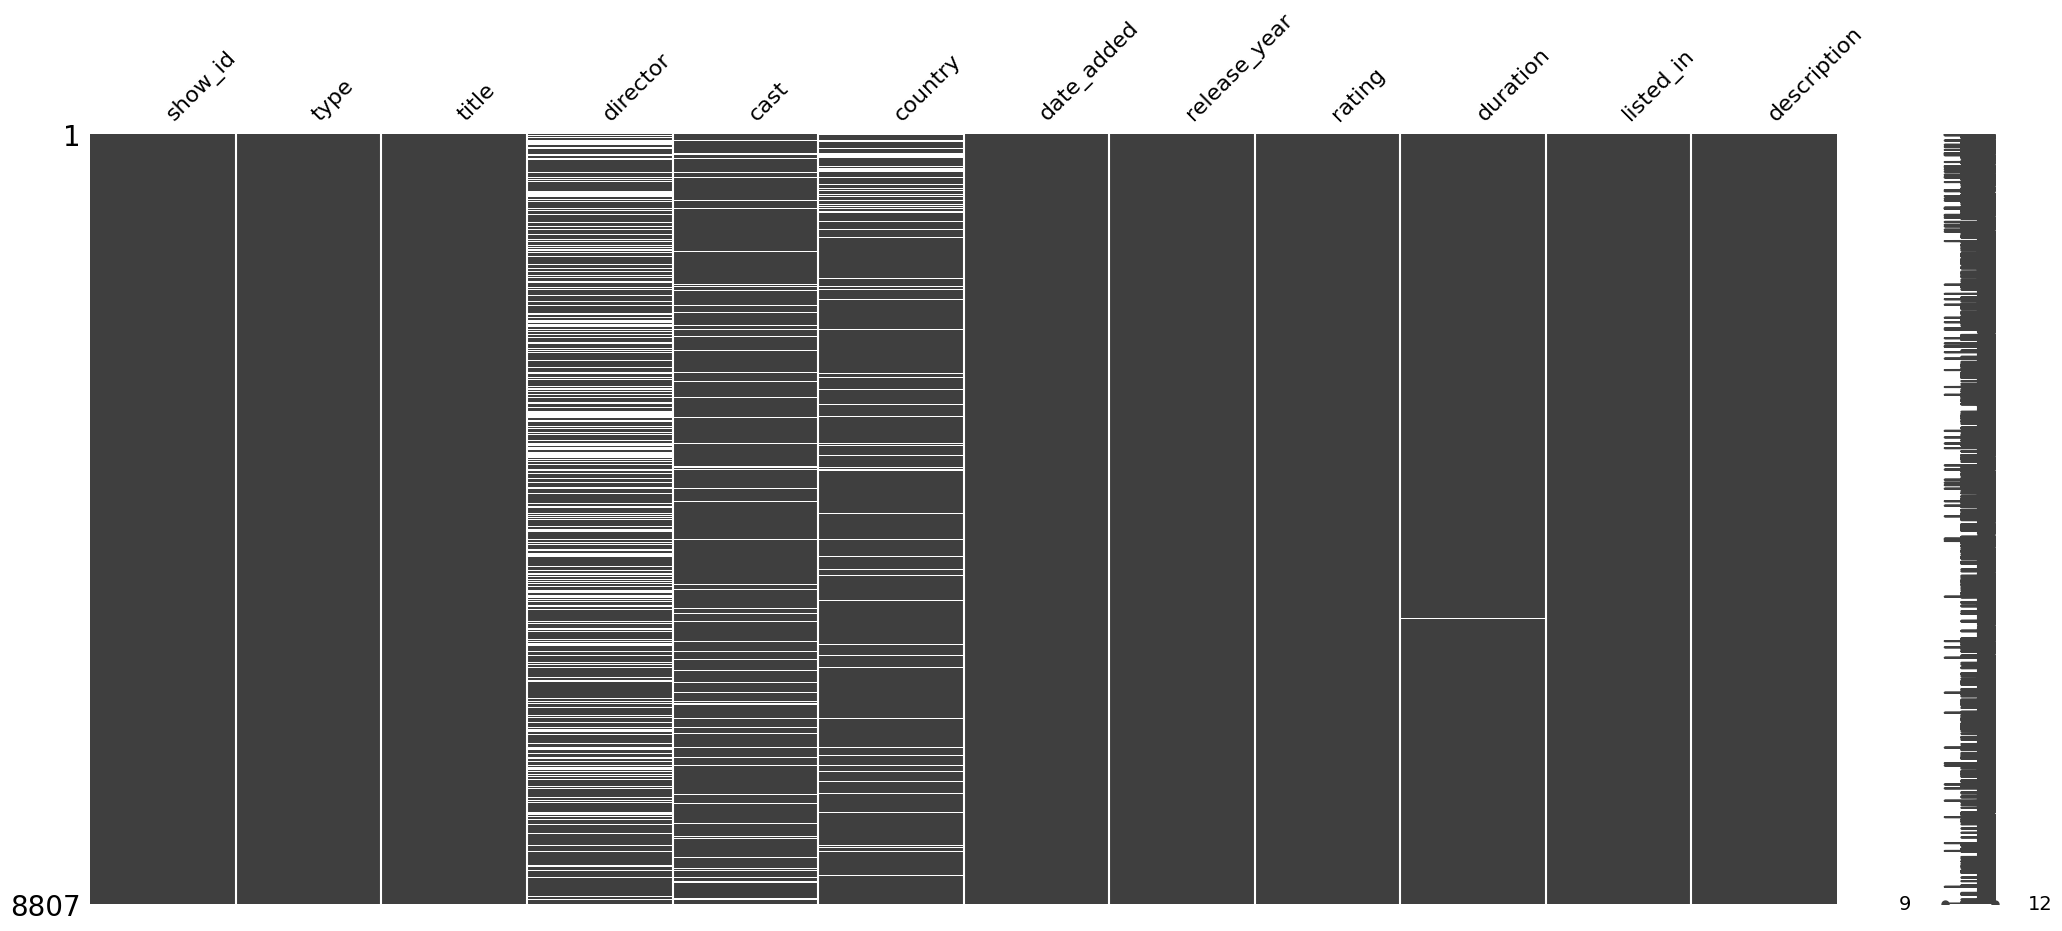

In [ ]:
import missingno as msno
msno.matrix(n)

In [ ]:
print(n.isnull().sum()) #missing value detection

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


There are gaps in columns namely:

*   director
*   cast
*   country
*   date_added
*   rating
*   duration

In [ ]:
def missing_value_table(df, get_null_columns=False): #statistical summary
 null_columns = [col for col in df.columns
 if df[col].isnull().sum() > 0]
 null_counts = n[null_columns].isnull().sum().sort_values(ascending=True)
 null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
 formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")
 null_df = pd.concat([null_counts, formatted_null_value_rates],
 axis=1, keys=["Null Value Count", "Null Value Rates"])
 print(null_df, end="\n")
 if get_null_columns:
  return null_columns
missing_value_table(n)

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


3.Content type related data


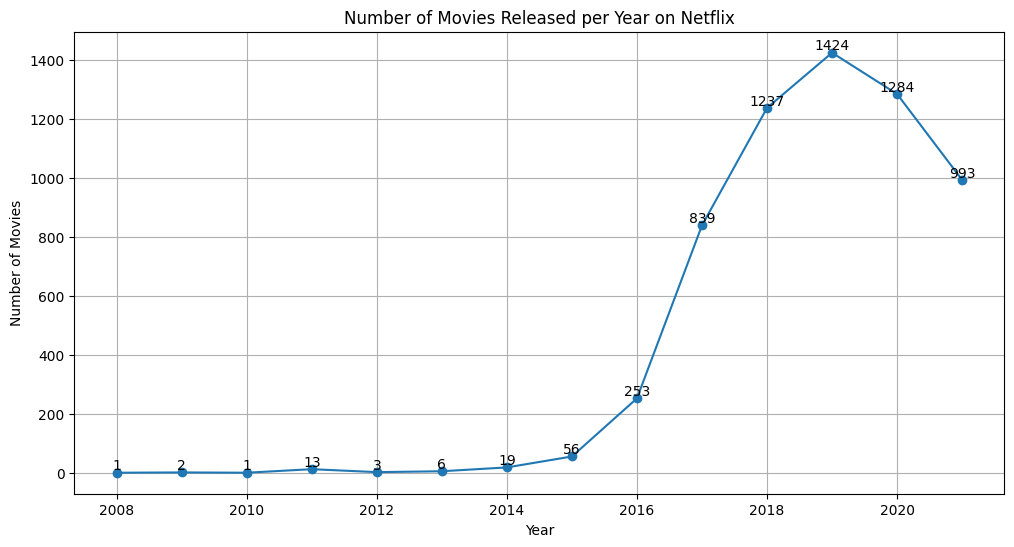

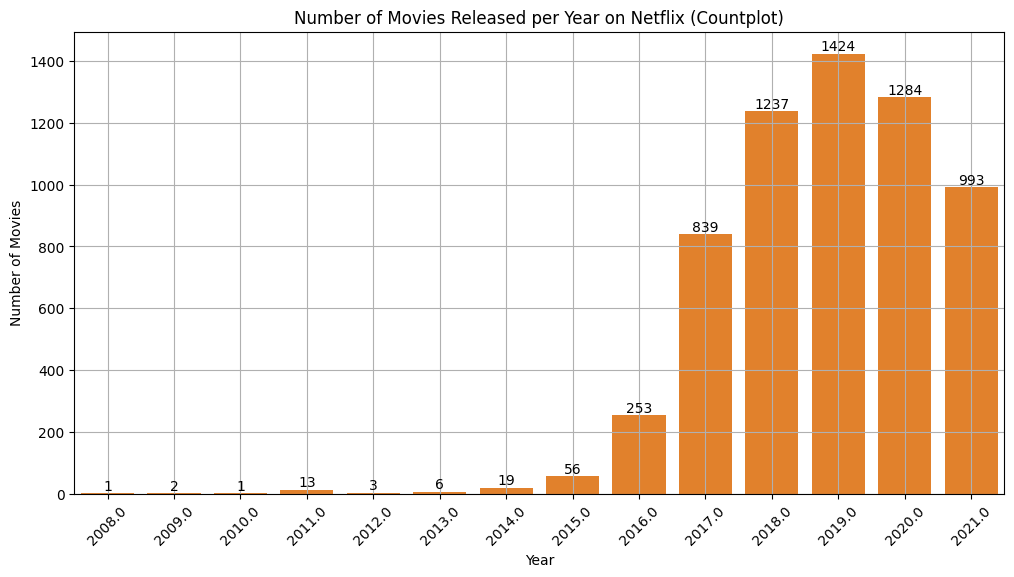

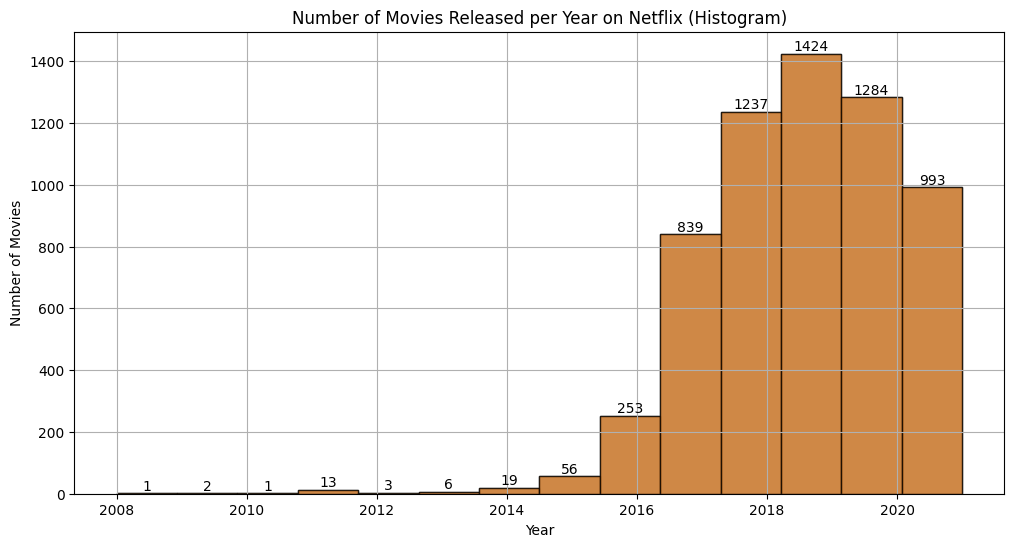

In [ ]:
n['year'] = pd.to_datetime(n['date_added'], errors='coerce').dt.year
movies = n[n['type'] == 'Movie']
movies_per_year = movies.groupby('year')['title'].count()
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
for x, y in zip(movies_per_year.index, movies_per_year.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year on Netflix')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=movies, x='year')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
sns.countplot(data=movies, x='year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year on Netflix (Countplot)')
plt.xticks(rotation=45)  #
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(movies['year'].dropna(), bins=len(movies_per_year), edgecolor='black', alpha=0.7)
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
             ha='center', va='bottom')
plt.hist(movies['year'].dropna(), bins=len(movies_per_year), edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year on Netflix (Histogram)')
plt.grid(True)
plt.show()

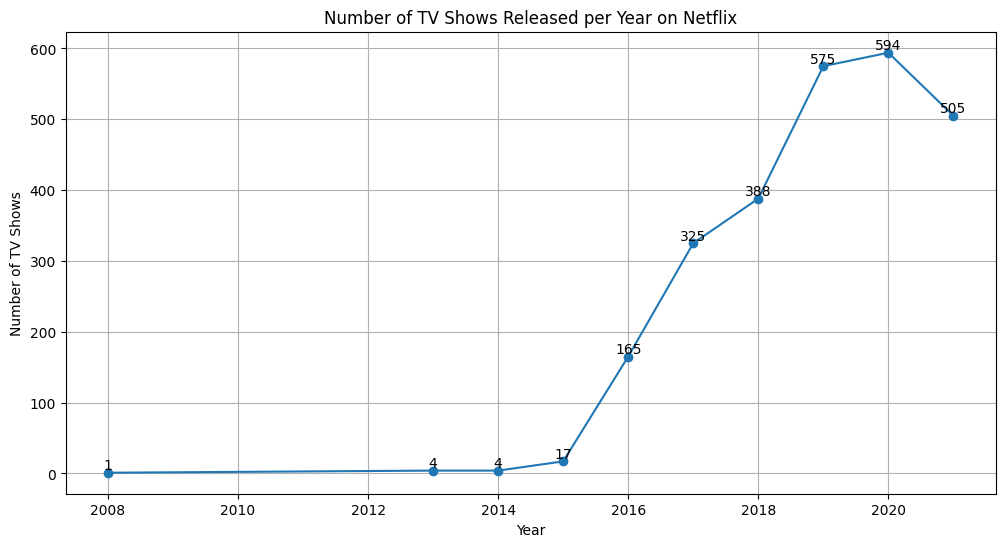

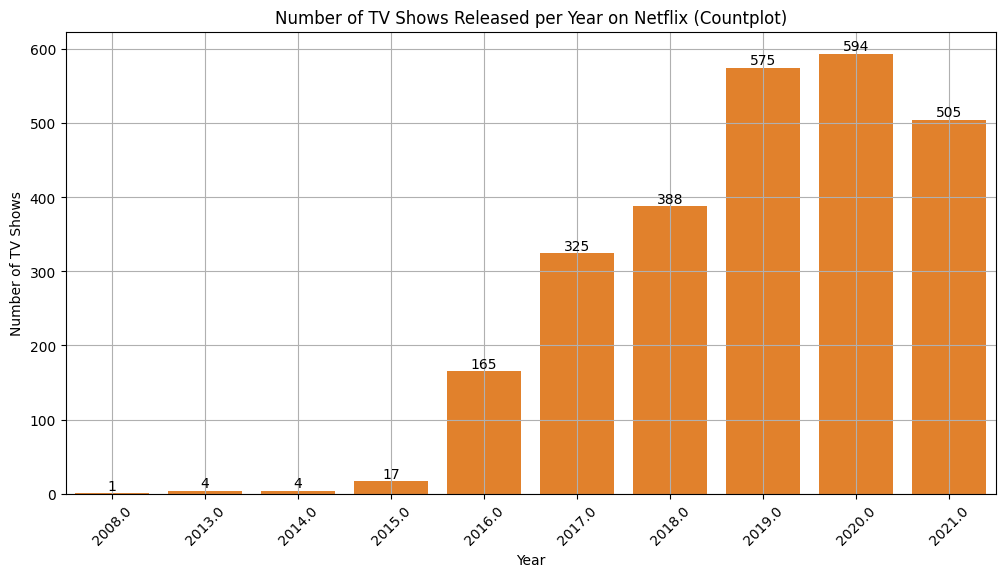

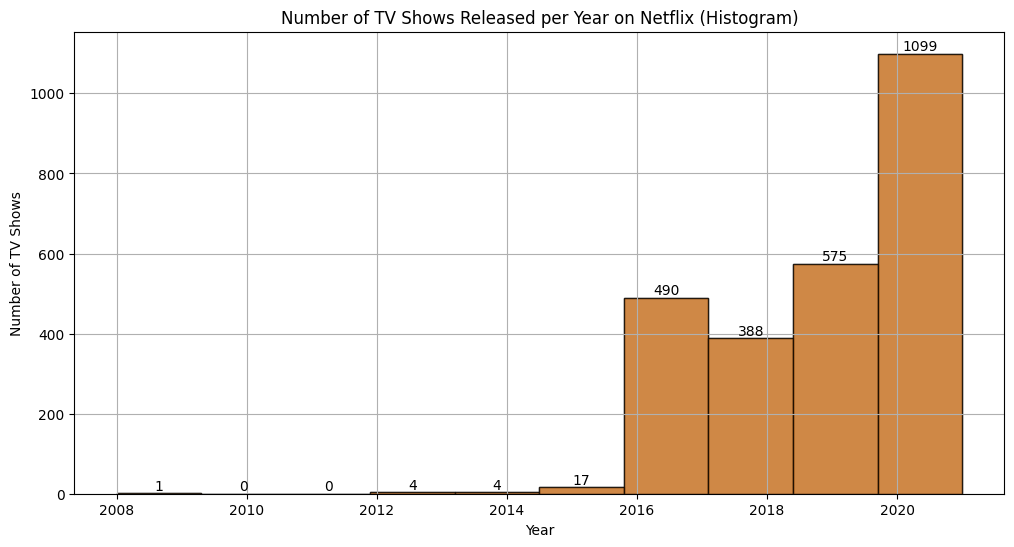

In [ ]:
n['year'] = pd.to_datetime(n['date_added'], errors='coerce').dt.year
movies = n[n['type'] == 'TV Show']
movies_per_year = movies.groupby('year')['title'].count()
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
for x, y in zip(movies_per_year.index, movies_per_year.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Year on Netflix')
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=movies, x='year')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
sns.countplot(data=movies, x='year')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Year on Netflix (Countplot)')
plt.xticks(rotation=45)  #
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(movies['year'].dropna(), bins=len(movies_per_year), edgecolor='black', alpha=0.7)
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
             ha='center', va='bottom')
plt.hist(movies['year'].dropna(), bins=len(movies_per_year), edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Year on Netflix (Histogram)')
plt.grid(True)
plt.show()

<ipython-input-132-452e79fb2809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month'] = pd.to_datetime(tv_shows['date_added'], errors='coerce').dt.month


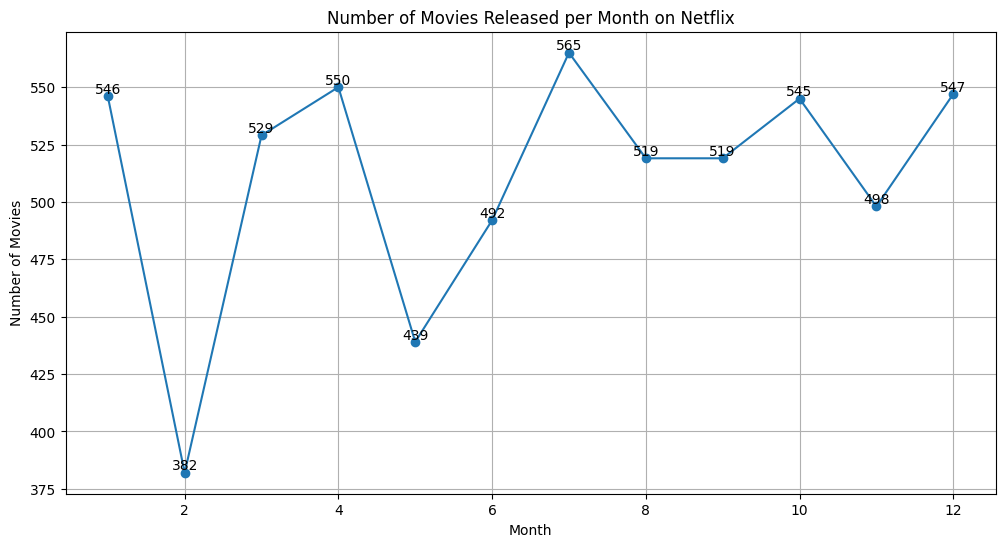

In [ ]:
tv_shows = n[n['type'] == 'Movie']
tv_shows['month'] = pd.to_datetime(tv_shows['date_added'], errors='coerce').dt.month
tv_shows_per_month = tv_shows.groupby('month')['title'].count()
plt.figure(figsize=(12, 6))
plt.plot(tv_shows_per_month.index, tv_shows_per_month.values, marker='o')
for x, y in zip(tv_shows_per_month.index, tv_shows_per_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Month on Netflix')
plt.grid(True)
plt.show()


<ipython-input-133-5c6ec7d8669e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month'] = pd.to_datetime(tv_shows['date_added'], errors='coerce').dt.month


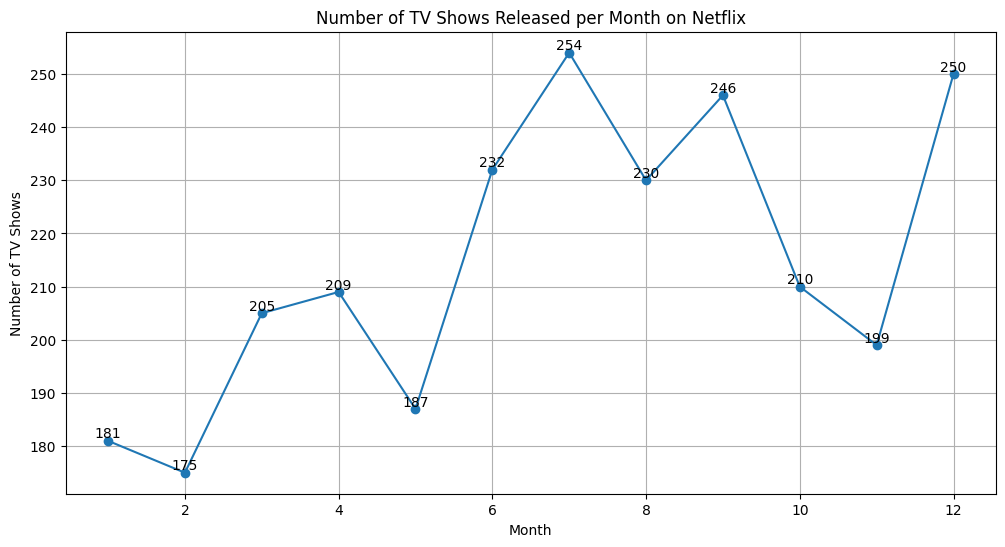

In [ ]:
tv_shows = n[n['type'] == 'TV Show']
tv_shows['month'] = pd.to_datetime(tv_shows['date_added'], errors='coerce').dt.month
tv_shows_per_month = tv_shows.groupby('month')['title'].count()
plt.figure(figsize=(12, 6))
plt.plot(tv_shows_per_month.index, tv_shows_per_month.values, marker='o')
for x, y in zip(tv_shows_per_month.index, tv_shows_per_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Month on Netflix')
plt.grid(True)
plt.show()


<ipython-input-134-f031414e23c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
<ipython-input-134-f031414e23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['day_of_week'] = movies['date_added'].dt.day_name()  # Get the day of the week


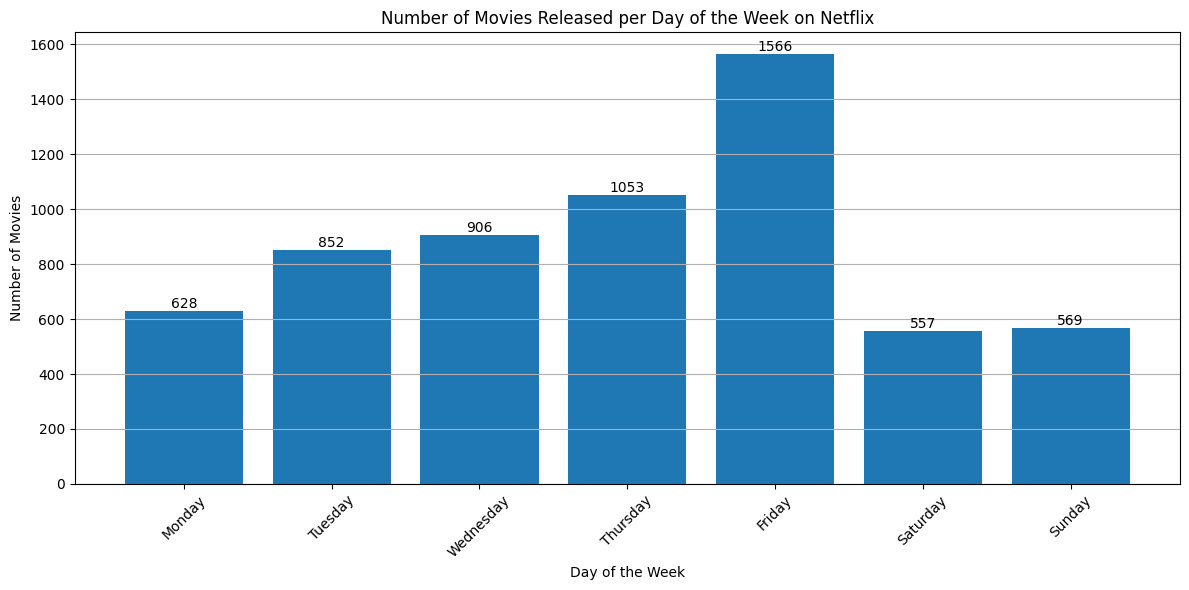

In [ ]:
movies = n[n['type'] == 'Movie']
movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
movies['day_of_week'] = movies['date_added'].dt.day_name()  # Get the day of the week
movies_per_day = movies['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
plt.bar(movies_per_day.index, movies_per_day.values)
for x, y in zip(movies_per_day.index, movies_per_day.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Day of the Week on Netflix')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-135-96921eda6023>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
<ipython-input-135-96921eda6023>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['day_of_week'] = movies['date_added'].dt.day_name()  # Get the day of the week


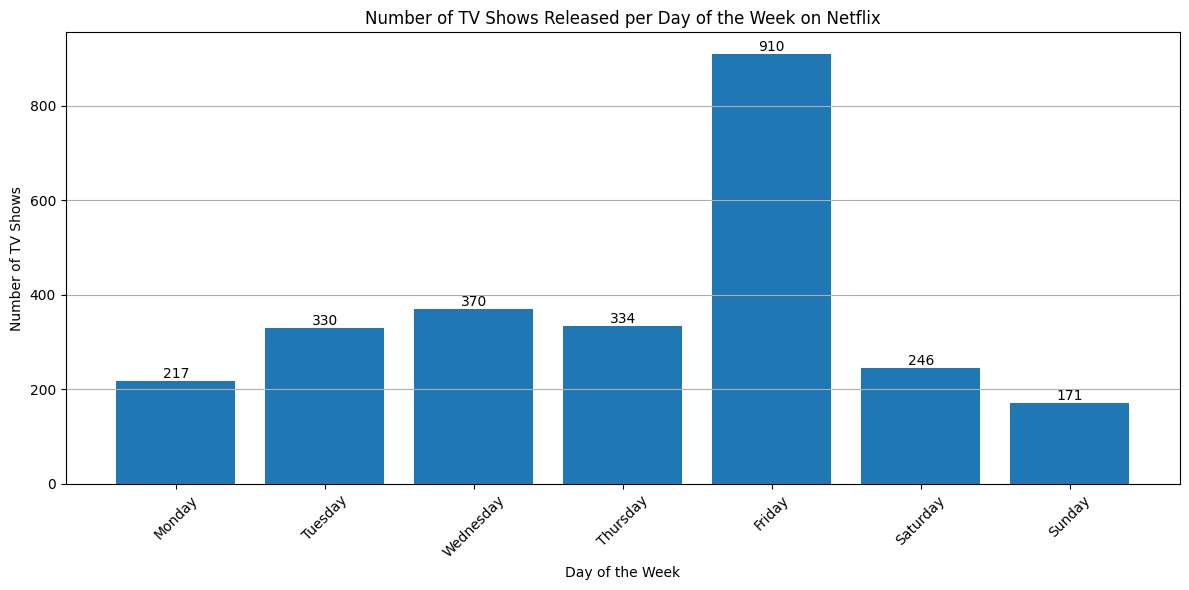

In [ ]:
movies = n[n['type'] == 'TV Show']
movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
movies['day_of_week'] = movies['date_added'].dt.day_name()  # Get the day of the week
movies_per_day = movies['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
plt.bar(movies_per_day.index, movies_per_day.values)
for x, y in zip(movies_per_day.index, movies_per_day.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Day of the Week')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Released per Day of the Week on Netflix')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

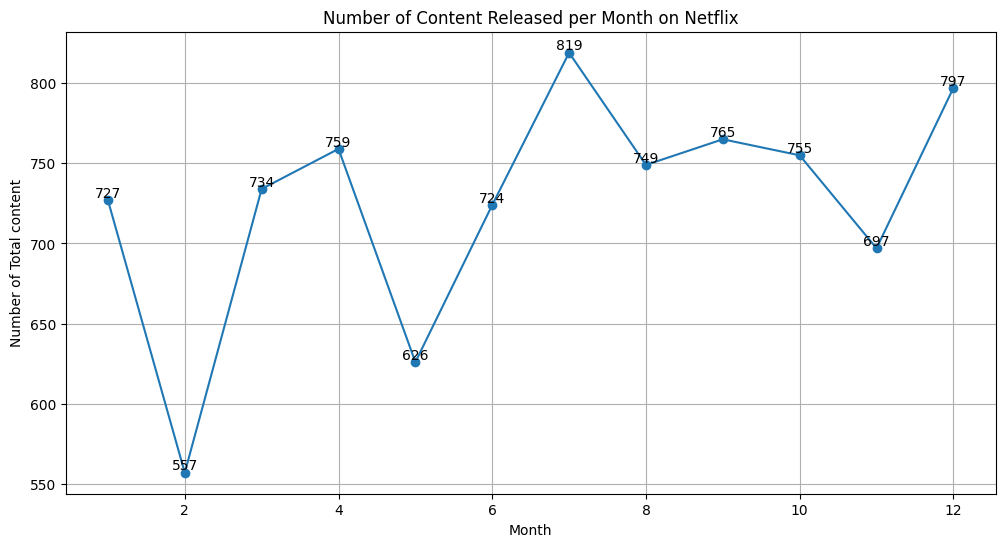

In [ ]:
tv_shows = n[(n['type'] == 'TV Show' )|(n['type'] == 'Movie')]
tv_shows['month'] = pd.to_datetime(tv_shows['date_added'], errors='coerce').dt.month
tv_shows_per_month = tv_shows.groupby('month')['title'].count()
plt.figure(figsize=(12, 6))
plt.plot(tv_shows_per_month.index, tv_shows_per_month.values, marker='o')
for x, y in zip(tv_shows_per_month.index, tv_shows_per_month.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Number of Total content')
plt.title('Number of Content Released per Month on Netflix')
plt.grid(True)
plt.show()

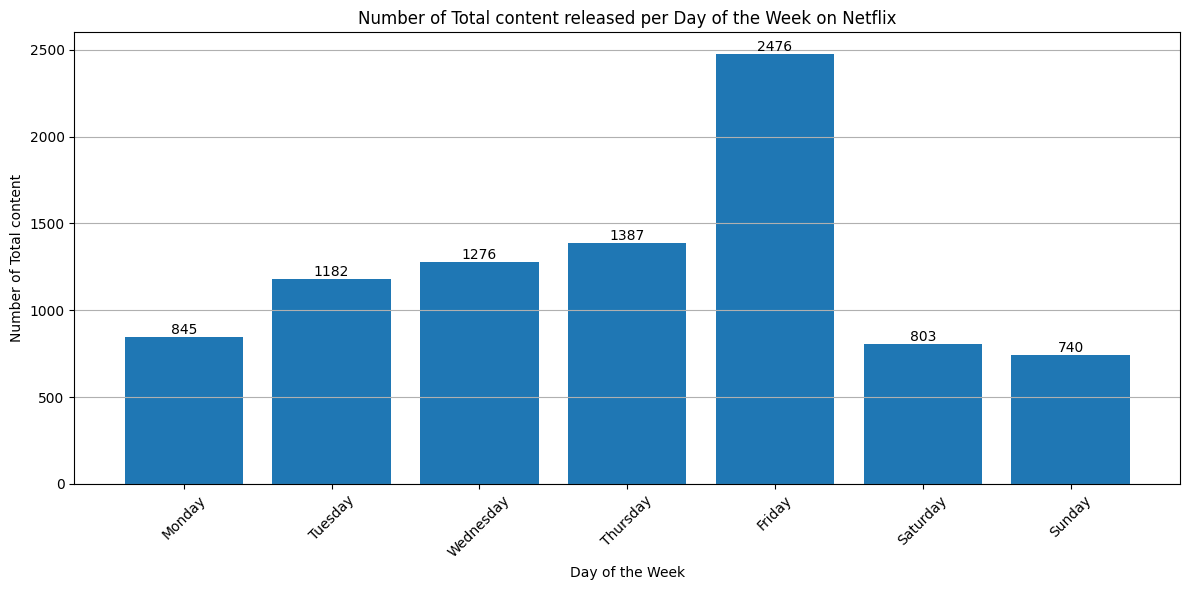

In [ ]:
movies = n[(n['type'] == 'TV Show')|(n['type'] == 'Movie')]
movies['date_added'] = pd.to_datetime(movies['date_added'], errors='coerce')
movies['day_of_week'] = movies['date_added'].dt.day_name()  # Get the day of the week
movies_per_day = movies['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 6))
plt.bar(movies_per_day.index, movies_per_day.values)
for x, y in zip(movies_per_day.index, movies_per_day.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Total content')
plt.title('Number of Total content released per Day of the Week on Netflix')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

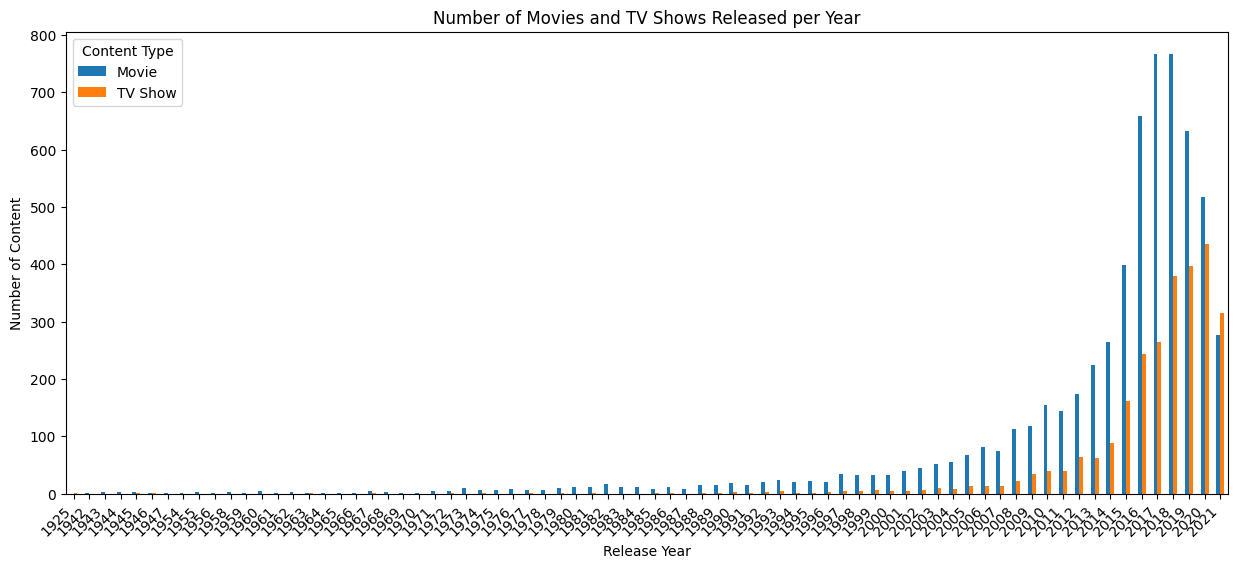

In [ ]:
content_count_per_year = n.groupby(['release_year', 'type'])['show_id'].count().unstack()
content_count_per_year.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Release Year')
plt.ylabel('Number of Content')
plt.title('Number of Movies and TV Shows Released per Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.show()


In [ ]:
movie_count = n[n['type'] == 'Movie'].shape[0]
tv_show_count = n[n['type'] == 'TV Show'].shape[0]
print(f"Number of Movies: {movie_count}")
print(f"Number of TV Shows: {tv_show_count}")

Number of Movies: 6131
Number of TV Shows: 2676


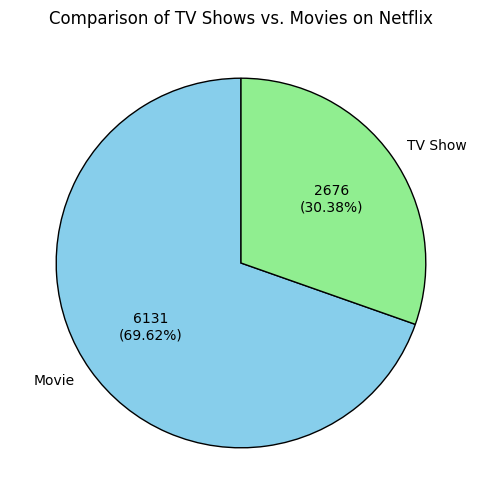

In [ ]:
content_type_counts = n.groupby('type')['title'].count()
total_counts = content_type_counts.sum()
percentages = (content_type_counts / total_counts) * 100
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count}\n({pct:.2f}%)'
    return my_format
plt.figure(figsize=(8, 6))
plt.pie(content_type_counts.values, labels=content_type_counts.index, autopct=autopct_format(content_type_counts.values),
        startangle=90, colors=['skyblue', 'lightgreen'], wedgeprops={'edgecolor': 'black'})
plt.title('Comparison of TV Shows vs. Movies on Netflix')
plt.show()

splitting multiple directors

In [ ]:
new_rows = []
for index, row in n.iterrows():
  directors = row['director']
  if pd.notna(directors):
    for director in directors.split(', '):
      new_row = row.copy()
      new_row['director'] = director.strip()
      new_rows.append(new_row)
  else:
    new_rows.append(row)
director_set= pd.DataFrame(new_rows)
director_set.shape

(9612, 13)

In [ ]:
unique_directors_count = director_set['director'].nunique()
print(f"Number of unique directors: {unique_directors_count}")

Number of unique directors: 4993


Top 10 Movie Directors:
                 director   type  title
3810        Rajiv Chilaka  Movie     22
1931            Jan Suter  Movie     21
3863          Raúl Campos  Movie     19
4529          Suhas Kadav  Movie     16
1982            Jay Karas  Movie     15
2912         Marcus Raboy  Movie     15
767   Cathy Garcia-Molina  Movie     13
1979          Jay Chapman  Movie     12
2993      Martin Scorsese  Movie     12
5023      Youssef Chahine  Movie     12

Top 10 TV Show Directors:
                   director     type  title
147     Alastair Fothergill  TV Show      3
2490              Ken Burns  TV Show      3
1548  Gautham Vasudev Menon  TV Show      2
1778            Hsu Fu-chun  TV Show      2
1810         Iginio Straffi  TV Show      2
2123          Joe Berlinger  TV Show      2
2378             Jung-ah Im  TV Show      2
2807            Lynn Novick  TV Show      2
3962        Rob Seidenglanz  TV Show      2
4342            Shin Won-ho  TV Show      2


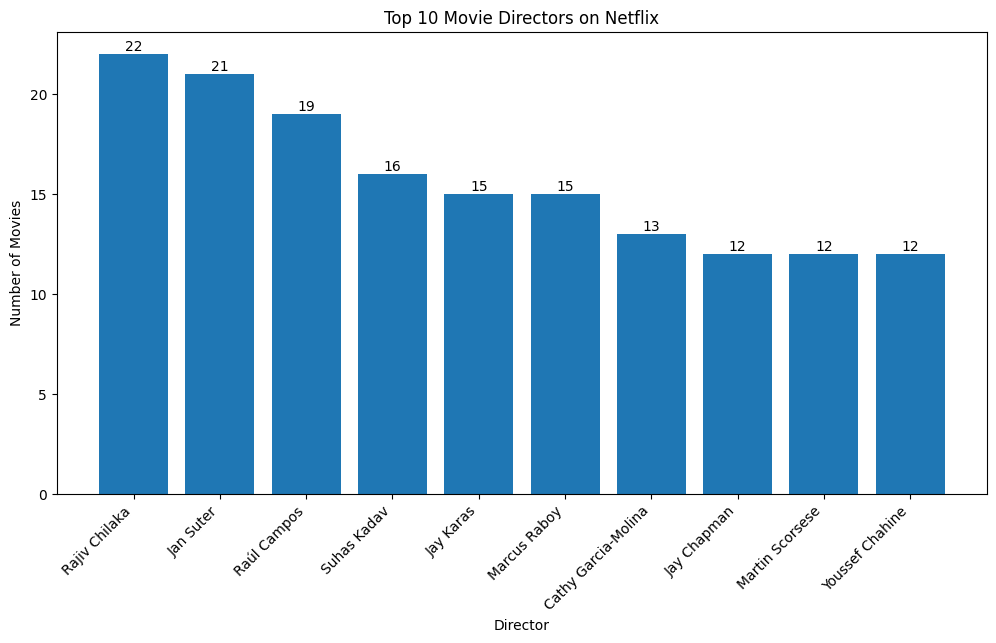

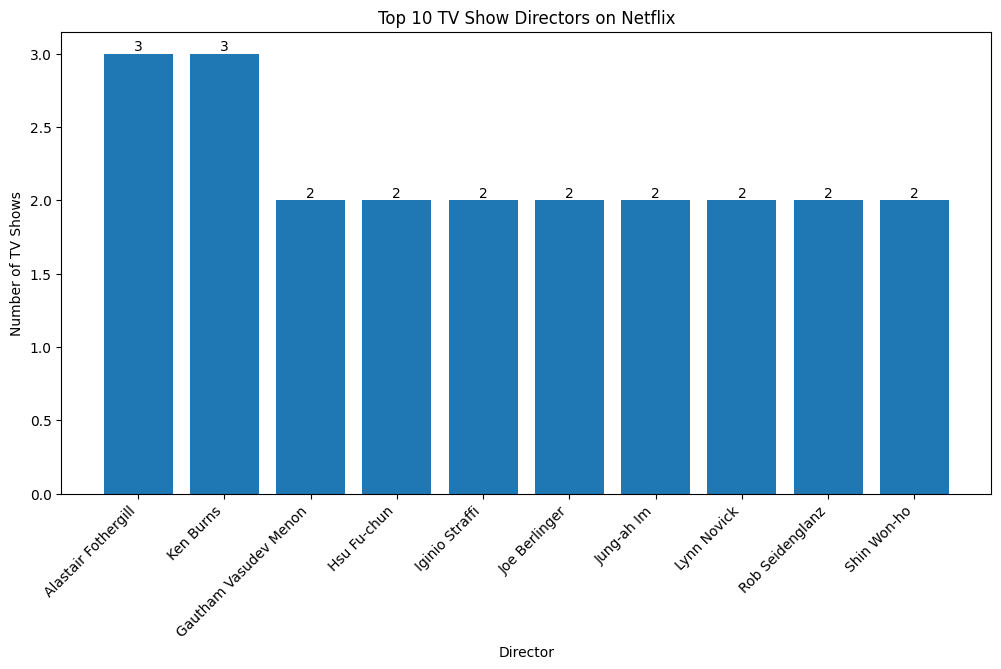

In [ ]:
director_type_counts = director_set.groupby(['director', 'type'])['title'].count().reset_index()
top_movie_directors = director_type_counts[director_type_counts['type'] == 'Movie'].nlargest(10, 'title')
top_tv_show_directors = director_type_counts[director_type_counts['type'] == 'TV Show'].nlargest(10, 'title')
print("Top 10 Movie Directors:")
print(top_movie_directors)
print("\nTop 10 TV Show Directors:")
print(top_tv_show_directors)
plt.figure(figsize=(12, 6))
bars_movie = plt.bar(top_movie_directors['director'], top_movie_directors['title'])
for bar in bars_movie:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Directors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.figure(figsize=(12, 6))
bars_tv = plt.bar(top_tv_show_directors['director'], top_tv_show_directors['title'])
for bar in bars_tv:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Director')
plt.ylabel('Number of TV Shows')
plt.title('Top 10 TV Show Directors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()

splitting multiple cast

In [ ]:
new_rows_cast = []
for index, row in n.iterrows():
  casts = row['cast']
  if pd.notna(casts):
    for cast in casts.split(', '):
      new_row = row.copy()
      new_row['cast'] = cast.strip()
      new_rows_cast.append(new_row)
  else:
    new_rows_cast.append(row)
cast_set = pd.DataFrame(new_rows_cast)

Top 10 Movie Actors:
                   cast   type  title
3177        Anupam Kher  Movie     42
34225    Shah Rukh Khan  Movie     35
27208  Naseeruddin Shah  Movie     32
952        Akshay Kumar  Movie     30
28569           Om Puri  Movie     30
1994   Amitabh Bachchan  Movie     28
18761     Julie Tejwani  Movie     28
28965      Paresh Rawal  Movie     28
5073        Boman Irani  Movie     27
32524      Rupa Bhimani  Movie     27

Top 10 TV Show Actors:
                     cast     type  title
36532    Takahiro Sakurai  TV Show     25
40191           Yuki Kaji  TV Show     19
785             Ai Kayano  TV Show     17
8157          Daisuke Ono  TV Show     17
18903      Junichi Suwabe  TV Show     17
40167     Yuichi Nakamura  TV Show     16
18832        Jun Fukuyama  TV Show     15
40034    Yoshimasa Hosoya  TV Show     15
8803   David Attenborough  TV Show     14
14382      Hiroshi Kamiya  TV Show     13


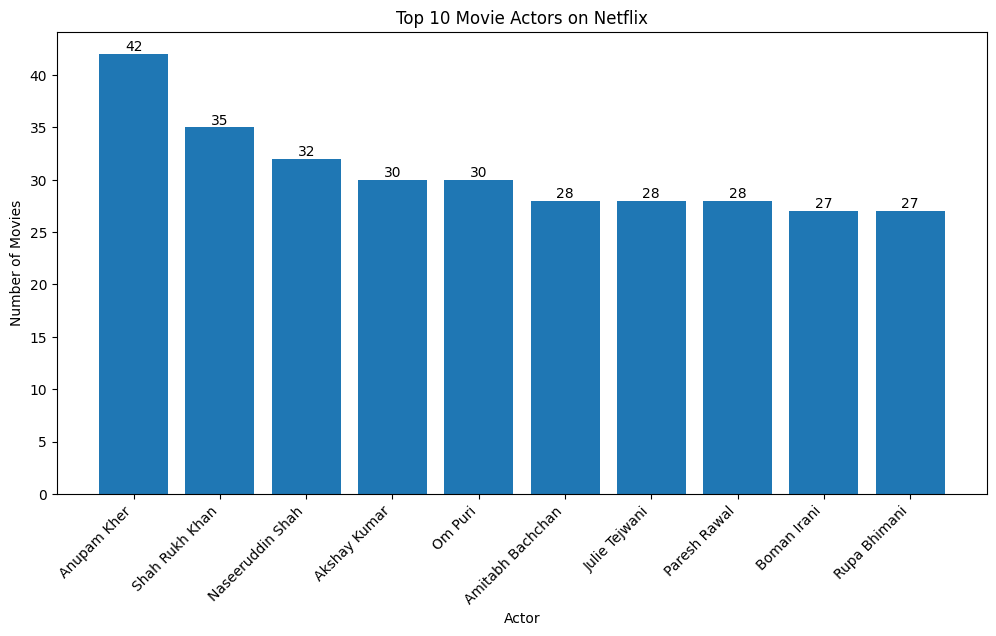

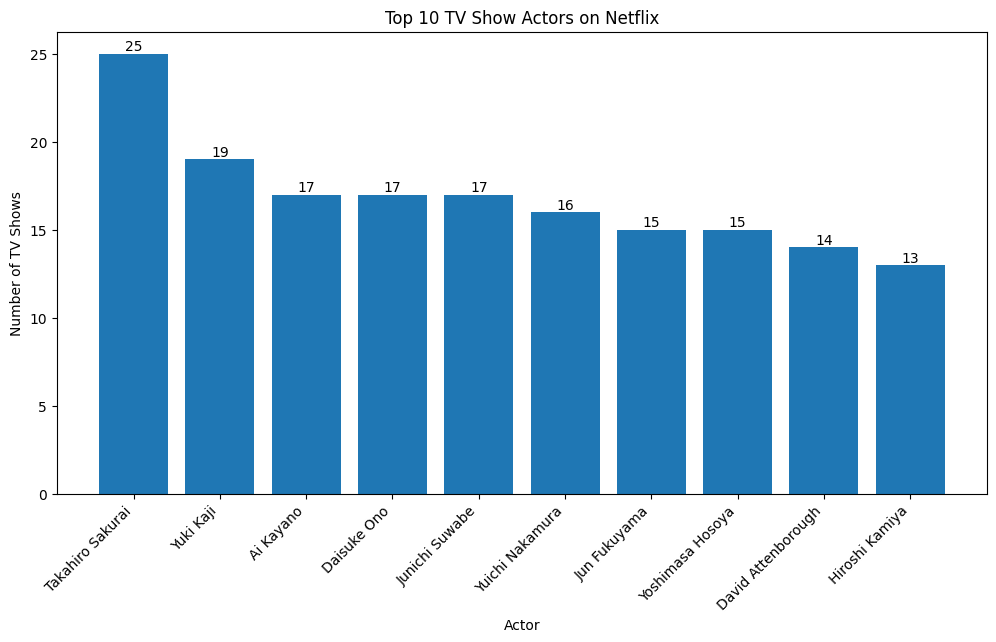

In [ ]:
actor_type_counts = cast_set.groupby(['cast', 'type'])['title'].count().reset_index()
top_movie_actors = actor_type_counts[actor_type_counts['type'] == 'Movie'].nlargest(10, 'title')
top_tv_show_actors = actor_type_counts[actor_type_counts['type'] == 'TV Show'].nlargest(10, 'title')
print("Top 10 Movie Actors:")
print(top_movie_actors)
print("\nTop 10 TV Show Actors:")
print(top_tv_show_actors)
plt.figure(figsize=(12, 6))
bars_movie = plt.bar(top_movie_actors['cast'], top_movie_actors['title'])
for bar in bars_movie:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Actors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.figure(figsize=(12, 6))
bars_tv = plt.bar(top_tv_show_actors['cast'], top_tv_show_actors['title'])
for bar in bars_tv:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Actor')
plt.ylabel('Number of TV Shows')
plt.title('Top 10 TV Show Actors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Movie Actors:
                   cast   type  title
3177        Anupam Kher  Movie     42
34225    Shah Rukh Khan  Movie     35
27208  Naseeruddin Shah  Movie     32
952        Akshay Kumar  Movie     30
28569           Om Puri  Movie     30
1994   Amitabh Bachchan  Movie     28
18761     Julie Tejwani  Movie     28
28965      Paresh Rawal  Movie     28
5073        Boman Irani  Movie     27
32524      Rupa Bhimani  Movie     27


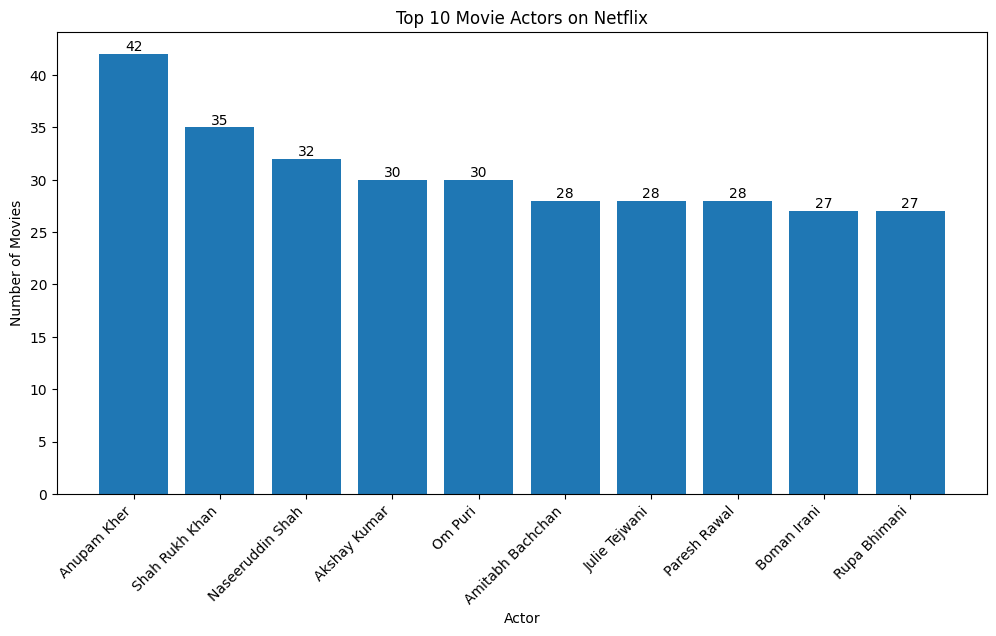

In [ ]:
cast_type_counts = cast_set.groupby(['cast', 'type'])['title'].count().reset_index()
top_movie_actors = cast_type_counts[cast_type_counts['type'] == 'Movie'].nlargest(10, 'title')
print("Top 10 Movie Actors:")
print(top_movie_actors)
plt.figure(figsize=(12, 6))
bars_movie = plt.bar(top_movie_actors['cast'], top_movie_actors['title'])
for bar in bars_movie:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Actors on Netflix')
plt.xticks(rotation=45, ha='right')
plt.show()

splitting multiple countries

In [ ]:
new_rows_country = []
for index, row in n.iterrows():
  countries = row['country']
  if pd.notna(countries):
    for country in countries.split(', '):
      new_row = row.copy()
      new_row['country'] = country.strip()
      new_rows_country.append(new_row)
  else:
    new_rows_country.append(row)
country_set = pd.DataFrame(new_rows_country)

In [ ]:
new_rows_listed_in = []
for index, row in n.iterrows():
  listed_ins = row['listed_in']
  if pd.notna(listed_ins):
    for listed_in in listed_ins.split(', '):
      new_row = row.copy()
      new_row['listed_in'] = listed_in.strip()
      new_rows_listed_in.append(new_row)
  else:
    new_rows_listed_in.append(row)
listed_in_set = pd.DataFrame(new_rows_listed_in)

<ipython-input-149-4cbab98e639c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=exploded_df, x='genres', palette='coolwarm', order=exploded_df['genres'].value_counts().index)


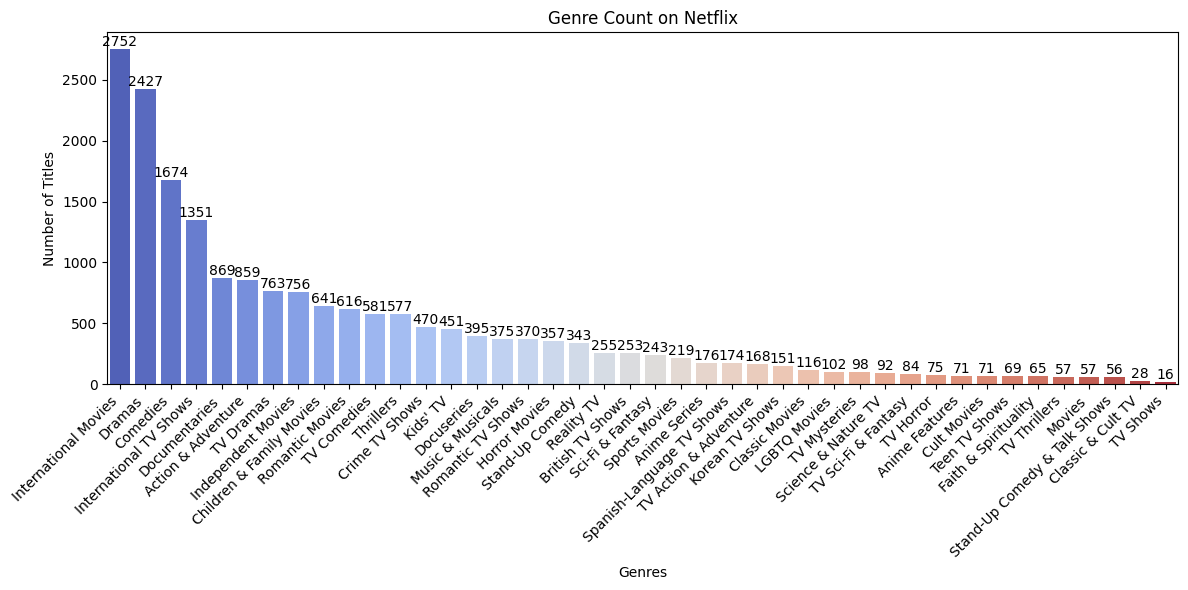

In [ ]:
listed_in_set['genres'] = listed_in_set['listed_in'].str.split(', ')
exploded_df = listed_in_set.explode('genres')
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=exploded_df, x='genres', palette='coolwarm', order=exploded_df['genres'].value_counts().index)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.title('Genre Count on Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-150-fe7e540b3d7d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=exploded_df, x='genres', palette='coolwarm', order=exploded_df['genres'].value_counts().index)


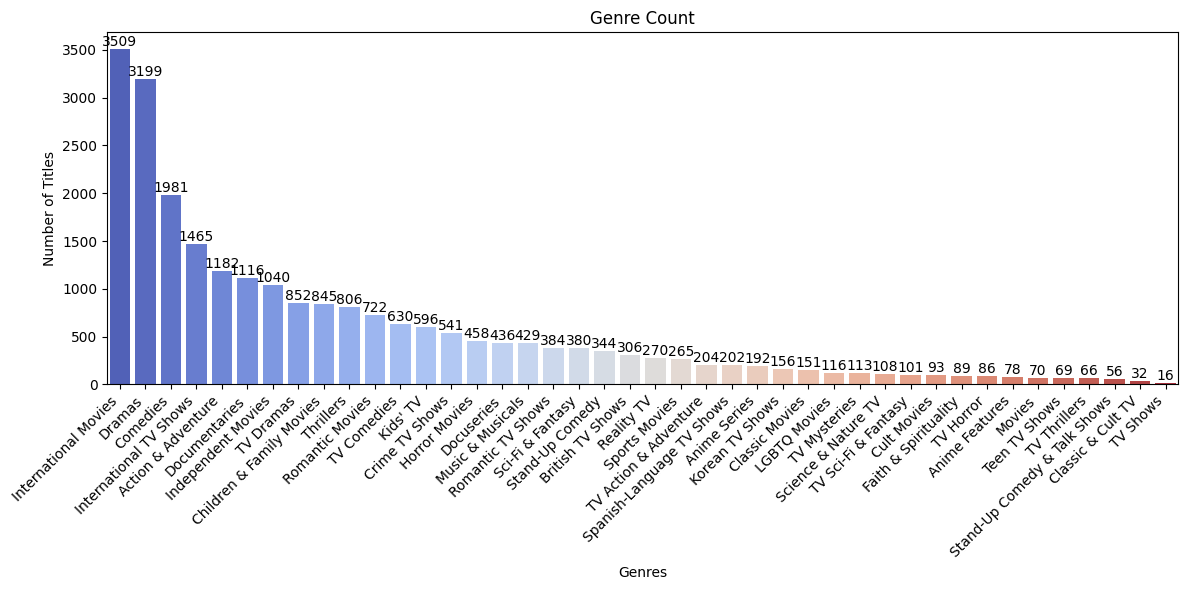

In [ ]:
country_set['genres'] = country_set['listed_in'].str.split(', ')
exploded_df = country_set.explode('genres')
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=exploded_df, x='genres', palette='coolwarm', order=exploded_df['genres'].value_counts().index)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.title('Genre Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
country_genre_counts = exploded_df.groupby(['country', 'genres'])['title'].count().reset_index()
highest_genre_per_country = country_genre_counts.loc[country_genre_counts.groupby('country')['title'].idxmax()]
highest_genre_per_country = highest_genre_per_country.sort_values(by='title', ascending=False)
print(highest_genre_per_country)

             country                    genres  title
526            India      International Movies    864
1351   United States                    Dramas    835
1300  United Kingdom          British TV Shows    225
391           France      International Movies    207
1109     South Korea    International TV Shows    152
...              ...                       ...    ...
5        Afghanistan             Documentaries      1
726    Liechtenstein            Classic Movies      1
710           Latvia                    Dramas      1
694       Kazakhstan  Children & Family Movies      1
729        Lithuania                    Dramas      1

[127 rows x 3 columns]


Top 10 Countries with the Most Content:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


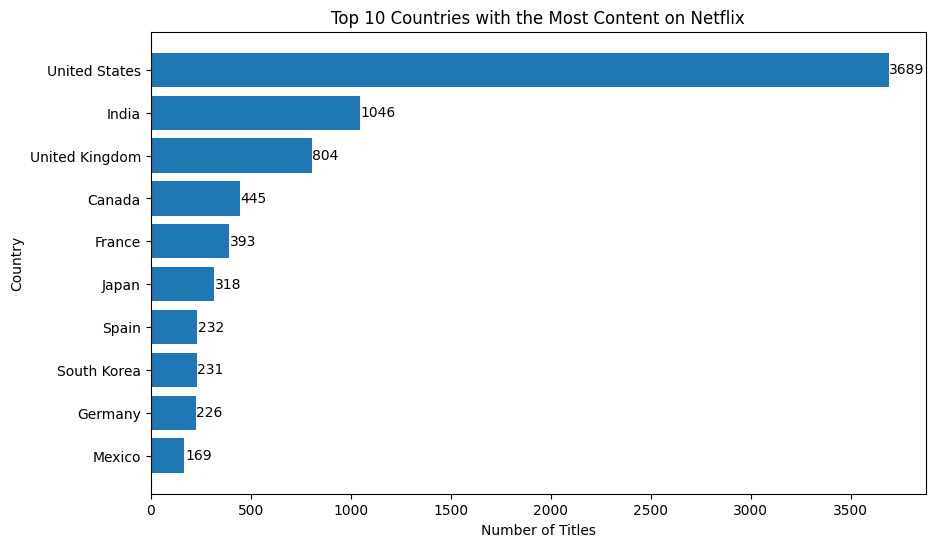




Top 10 Countries with the Most Movies:
country
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64


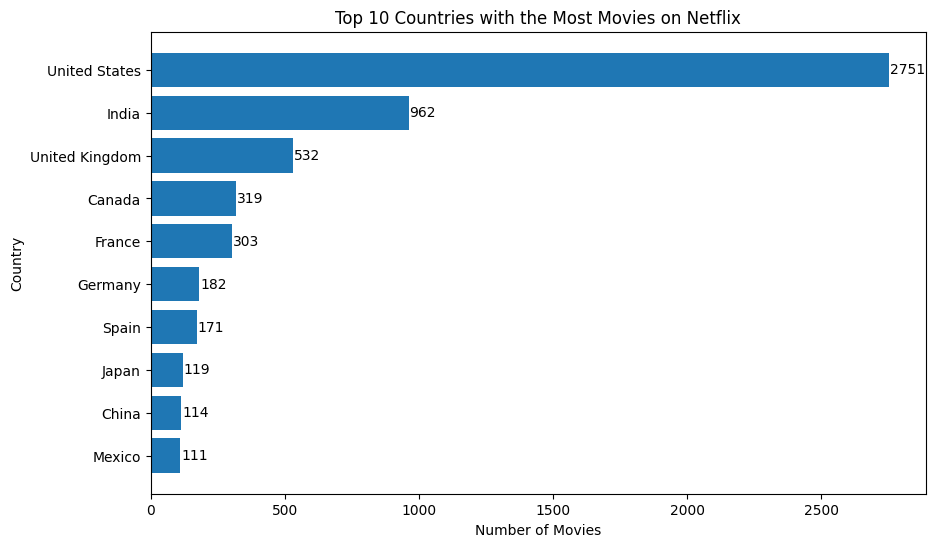




Top 10 Countries with the Most TV Shows:
country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64


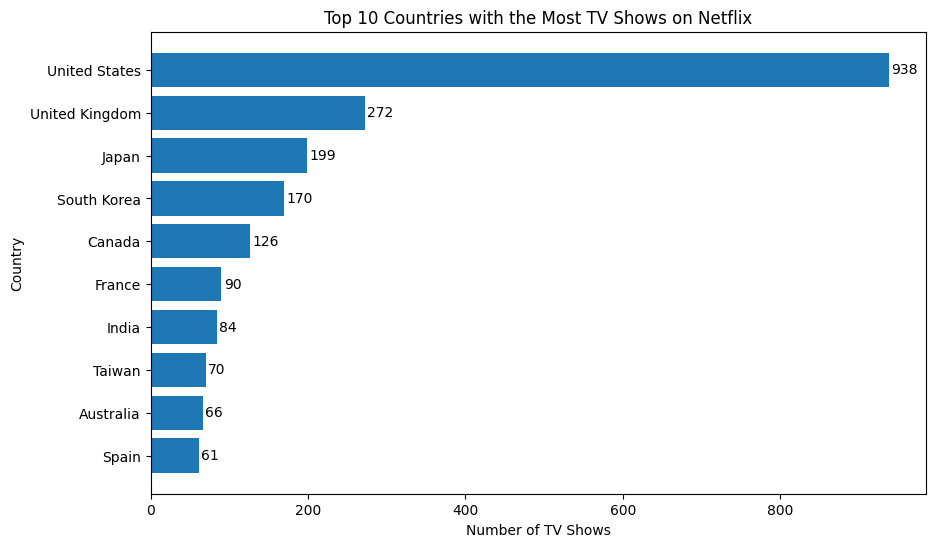

In [ ]:
country_counts = country_set['country'].value_counts().head(10)
print("Top 10 Countries with the Most Content:")
print(country_counts)
plt.figure(figsize=(10, 6))
bars = plt.barh(country_counts.index, country_counts.values)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center')
plt.show()
movies = country_set[country_set['type'] == 'Movie']
movie_country_counts = movies['country'].value_counts().head(10)
print("\n\n\nTop 10 Countries with the Most Movies:")
print(movie_country_counts)
plt.figure(figsize=(10, 6))
bars = plt.barh(movie_country_counts.index, movie_country_counts.values)
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Movies on Netflix')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center')
plt.show()
tv_shows = country_set[country_set['type'] == 'TV Show']
tv_country_counts = tv_shows['country'].value_counts().head(10)
print("\n\n\nTop 10 Countries with the Most TV Shows:")
print(tv_country_counts)
plt.figure(figsize=(10, 6))
bars = plt.barh(tv_country_counts.index, tv_country_counts.values)
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most TV Shows on Netflix')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width() + 3, bar.get_y() + bar.get_height() / 2,
             str(int(bar.get_width())), va='center')
plt.show()

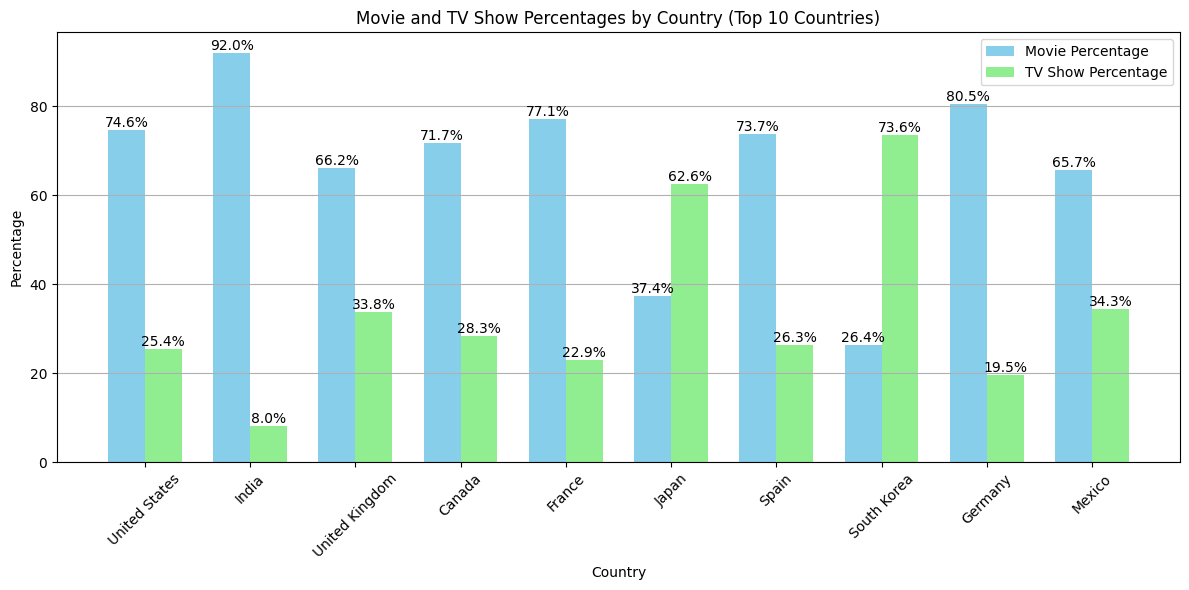

In [ ]:
country_type_counts = country_set.groupby(['country', 'type'])['show_id'].count().unstack()
country_type_counts['Total'] = country_type_counts['Movie'] + country_type_counts['TV Show']
country_type_counts['Movie Percentage'] = (country_type_counts['Movie'] / country_type_counts['Total']) * 100
country_type_counts['TV Show Percentage'] = (country_type_counts['TV Show'] / country_type_counts['Total']) * 100
top_10_countries_percentage = country_type_counts.nlargest(10, 'Total')[['Movie Percentage', 'TV Show Percentage']]
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(top_10_countries_percentage))
bars1 = plt.bar(x, top_10_countries_percentage['Movie Percentage'], width=bar_width, label='Movie Percentage', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], top_10_countries_percentage['TV Show Percentage'], width=bar_width, label='TV Show Percentage', color='lightgreen')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}%", ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.1f}%", ha='center', va='bottom')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Movie and TV Show Percentages by Country (Top 10 Countries)')
plt.xticks([p + bar_width / 2 for p in x], top_10_countries_percentage.index, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
country_type_counts = country_set.groupby(['country', 'type'])['show_id'].count().unstack()
countries_more_tv_shows = country_type_counts[country_type_counts['TV Show'] > country_type_counts['Movie']]
countries_more_tv_shows['Difference'] = countries_more_tv_shows['TV Show'] - countries_more_tv_shows['Movie']
countries_more_tv_shows_sorted = countries_more_tv_shows.sort_values('Difference', ascending=False)
print("Countries with more TV shows than movies (ordered by difference):")
print(countries_more_tv_shows_sorted)


Countries with more TV shows than movies (ordered by difference):
type         Movie  TV Show  Difference
country                                
South Korea   61.0    170.0       109.0
Japan        119.0    199.0        80.0
Taiwan        19.0     70.0        51.0
Colombia      20.0     32.0        12.0
Russia        11.0     16.0         5.0
Singapore     18.0     23.0         5.0
Ukraine        1.0      2.0         1.0


<ipython-input-154-94fbb2d5dcec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_more_tv_shows['Difference'] = countries_more_tv_shows['TV Show'] - countries_more_tv_shows['Movie']


In [ ]:
country_type_counts = country_set.groupby(['country', 'type'])['show_id'].count().unstack()
countries_more_movies = country_type_counts[country_type_counts['Movie'] > country_type_counts['TV Show']]
countries_more_movies['Difference'] = countries_more_movies['Movie'] - countries_more_movies['TV Show']
countries_more_movies_sorted = countries_more_movies.sort_values('Difference', ascending=False)
print("Countries with more movies than TV shows (ordered by difference):")
print(countries_more_movies_sorted)


Countries with more movies than TV shows (ordered by difference):
type                   Movie  TV Show  Difference
country                                          
United States         2751.0    938.0      1813.0
India                  962.0     84.0       878.0
United Kingdom         532.0    272.0       260.0
France                 303.0     90.0       213.0
Canada                 319.0    126.0       193.0
Germany                182.0     44.0       138.0
Spain                  171.0     61.0       110.0
Hong Kong              100.0      5.0        95.0
Egypt                  102.0     15.0        87.0
Nigeria                 94.0      9.0        85.0
Indonesia               86.0      4.0        82.0
Philippines             80.0      3.0        77.0
Belgium                 78.0     12.0        66.0
China                  114.0     48.0        66.0
Mexico                 111.0     58.0        53.0
Turkey                  83.0     30.0        53.0
Argentina               71.0     2

<ipython-input-155-0c7e811f832a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_more_movies['Difference'] = countries_more_movies['Movie'] - countries_more_movies['TV Show']


<ipython-input-156-bc19277d5d92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=n[n['type'] == 'Movie'], x='rating', palette='coolwarm')
<ipython-input-156-bc19277d5d92>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='rating', y='count', data=movie_ratings, palette='coolwarm')


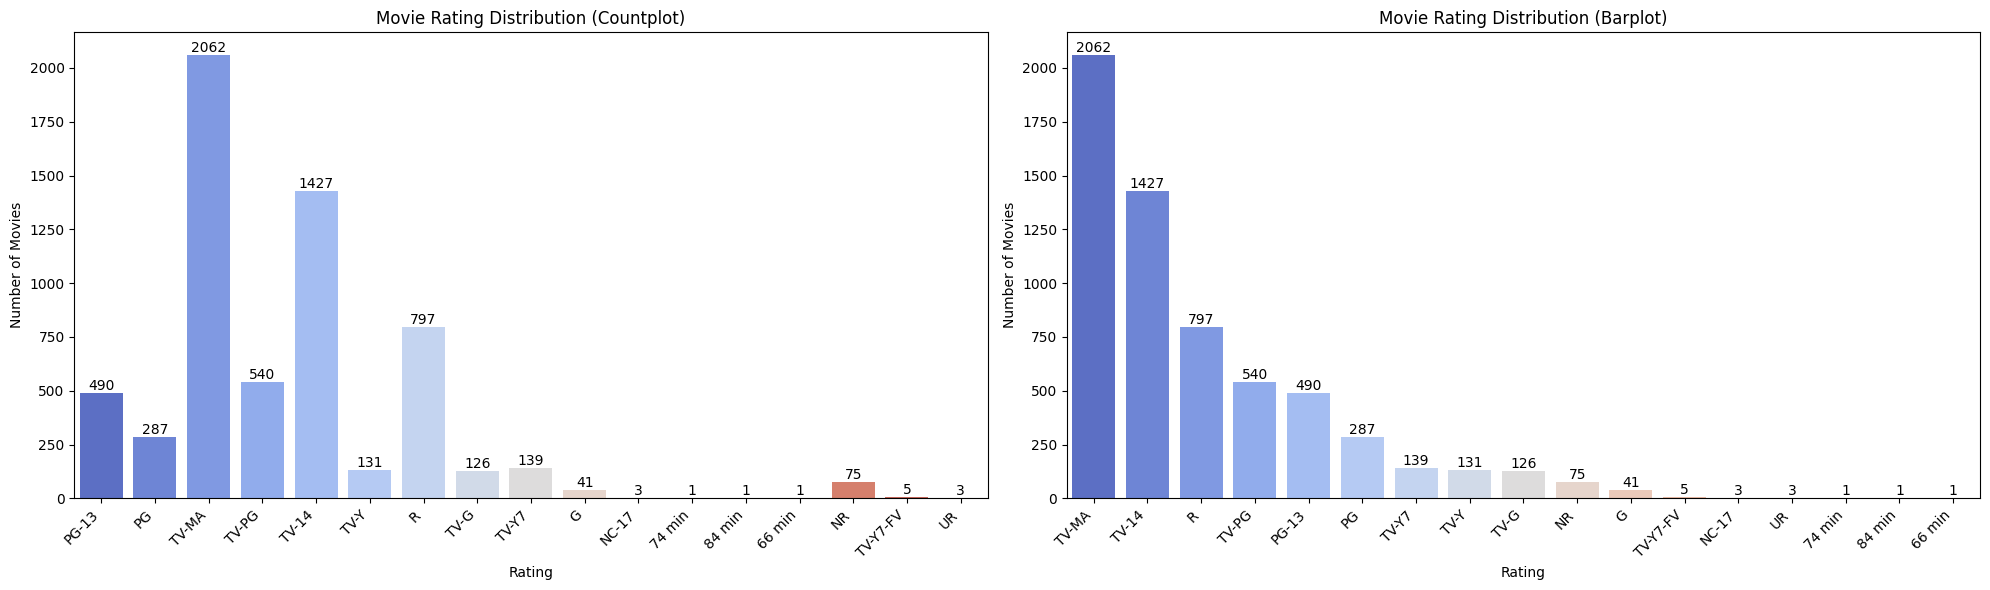

<ipython-input-156-bc19277d5d92>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.countplot(data=n[n['type'] == 'TV Show'], x='rating', palette='coolwarm')
<ipython-input-156-bc19277d5d92>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='rating', y='count', data=tv_ratings, palette='coolwarm')


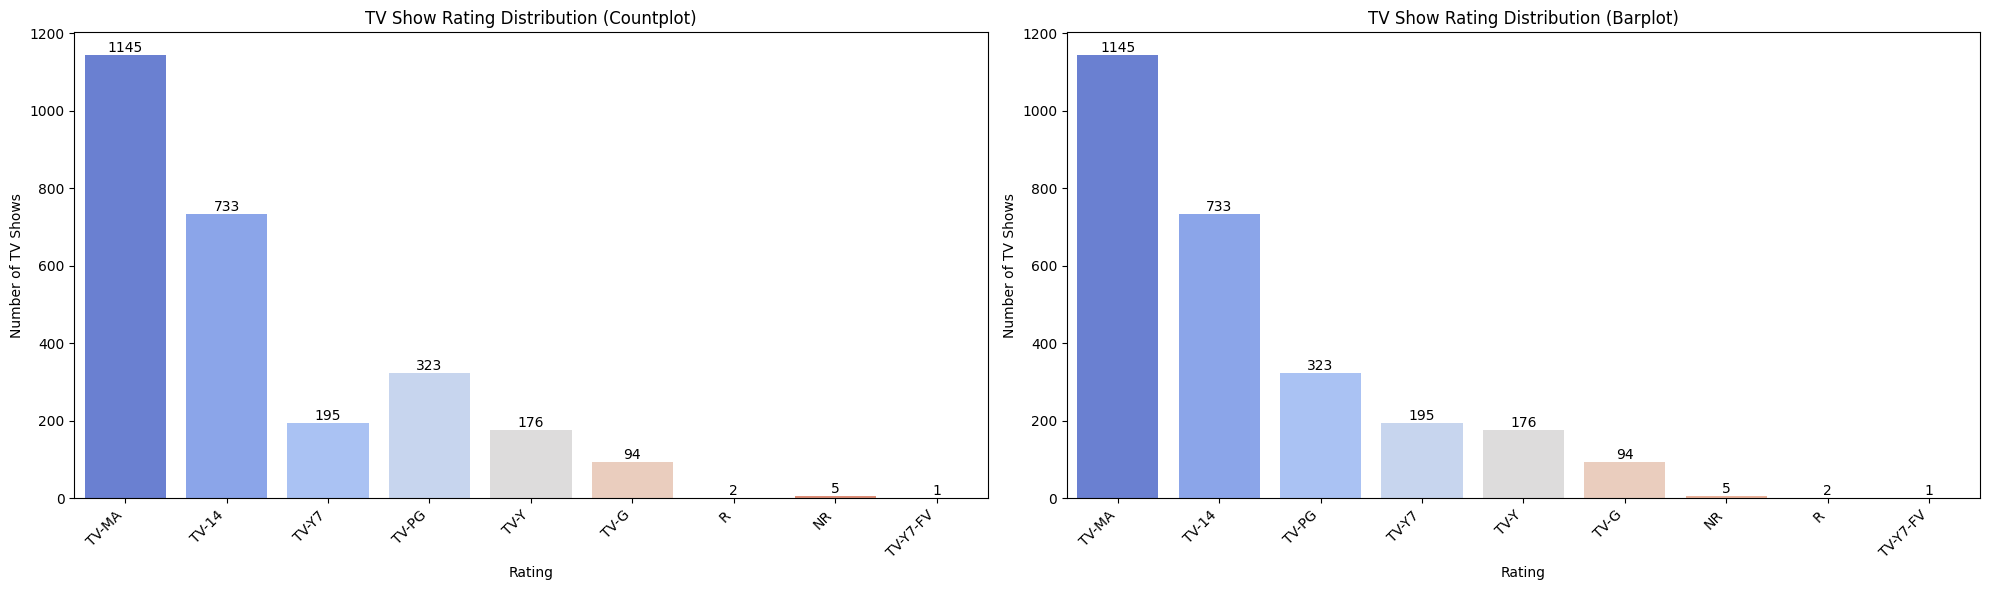

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=n[n['type'] == 'Movie'], x='rating', palette='coolwarm')
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Rating Distribution (Countplot)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
movie_ratings = n[n['type'] == 'Movie']['rating'].value_counts().reset_index()
movie_ratings.columns = ['rating', 'count']
ax2 = sns.barplot(x='rating', y='count', data=movie_ratings, palette='coolwarm')
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Rating Distribution (Barplot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax3 = sns.countplot(data=n[n['type'] == 'TV Show'], x='rating', palette='coolwarm')
for p in ax3.patches:
    ax3.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.title('TV Show Rating Distribution (Countplot)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
tv_ratings = n[n['type'] == 'TV Show']['rating'].value_counts().reset_index()
tv_ratings.columns = ['rating', 'count']
ax4 = sns.barplot(x='rating', y='count', data=tv_ratings, palette='coolwarm')
for p in ax4.patches:
    ax4.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.title('TV Show Rating Distribution (Barplot)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
rating_set= n.copy()
rating_category_map = {
    'TV-Y': 'Little Kids',
    'TV-Y7': 'Older Kids',
    'TV-G': 'Little Kids',
    'TV-PG': 'Older Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature',
    'NC-17': 'Mature',
    'TV-MA': 'Mature',
    'NR': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Mature'
}
rating_set['category'] = rating_set['rating'].map(rating_category_map)

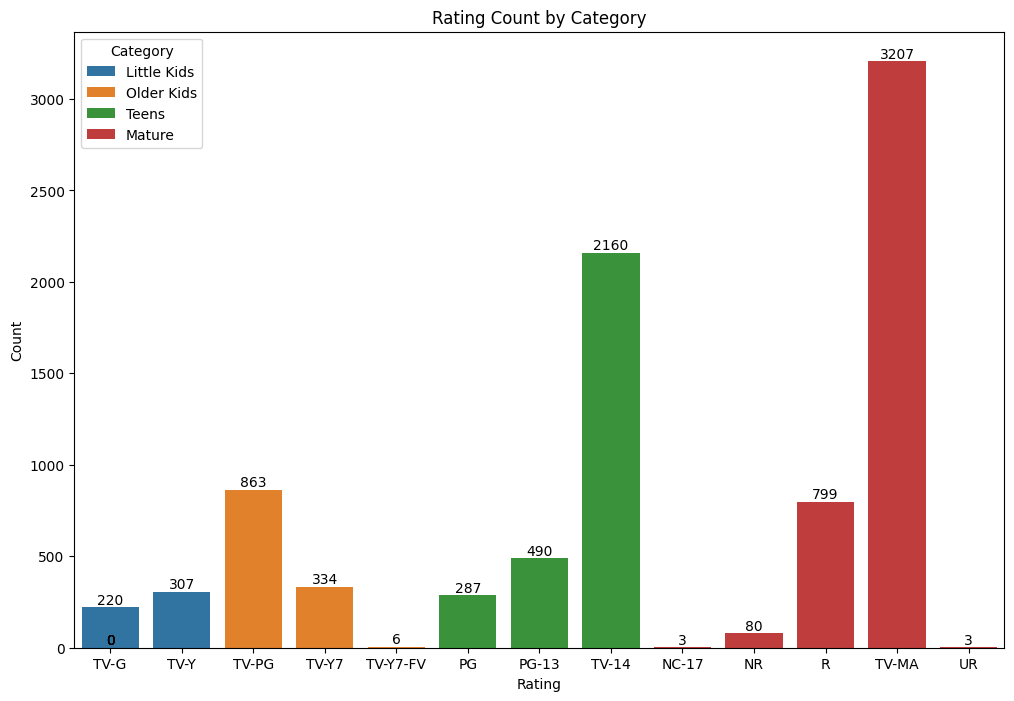

In [ ]:
rating_set_clean = rating_set.dropna(subset=['rating']).reset_index(drop=True)
categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
rating_counts_list = []
for category in categories:
    rating_set_category = rating_set_clean[rating_set_clean['category'] == category]
    rating_counts = rating_set_category.groupby('rating').size().reset_index(name='count')
    rating_counts['category'] = category  # Add a column for the category
    rating_counts_list.append(rating_counts)
all_rating_counts = pd.concat(rating_counts_list)
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=all_rating_counts, x='rating', y='count', hue='category')
plt.title('Rating Count by Category')
plt.xlabel('Rating')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10)
plt.legend(title='Category')
plt.show()

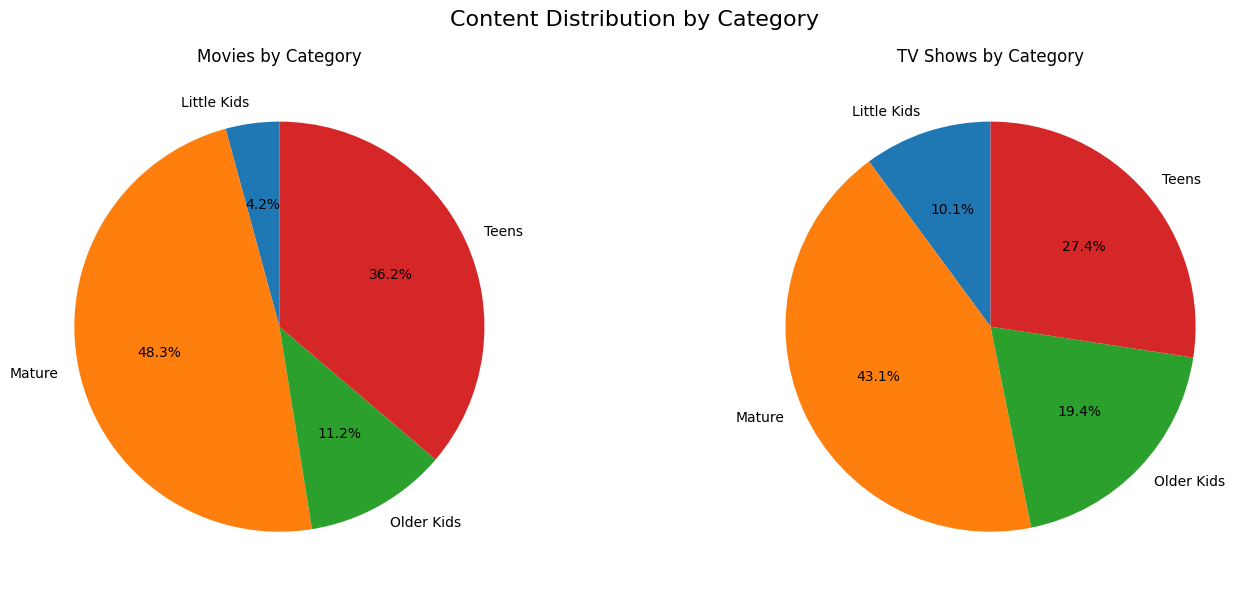

In [ ]:
category_type_counts = rating_set_clean.groupby(['category', 'type'])['title'].count().unstack()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Content Distribution by Category', fontsize=16)
axes[0].pie(category_type_counts['Movie'], labels=category_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Movies by Category')
axes[1].pie(category_type_counts['TV Show'], labels=category_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('TV Shows by Category')
plt.tight_layout()
plt.show()


In [ ]:
grouped = rating_set.groupby(['country', 'category']).size().reset_index(name='count')
total_count_per_country = rating_set.groupby('country').size().reset_index(name='total_count')
result = pd.merge(grouped, total_count_per_country, on='country')
result['percentage'] = (result['count'] / result['total_count']) * 100
final_result = result[['country', 'category', 'count', 'percentage']]
final_result.head(11)

,country,category,count,percentage
0,", France, Algeria",Teens,1,100.000000
1,", South Korea",Mature,1,100.000000
2,Argentina,Little Kids,4,7.142857
3,Argentina,Mature,42,75.000000
4,Argentina,Older Kids,3,5.357143
5,Argentina,Teens,7,12.500000
6,"Argentina, Brazil, France, Poland, Germany, De...",Teens,1,100.000000
7,"Argentina, Chile",Mature,1,50.000000
8,"Argentina, Chile",Teens,1,50.000000
9,"Argentina, Chile, Peru",Mature,1,100.000000


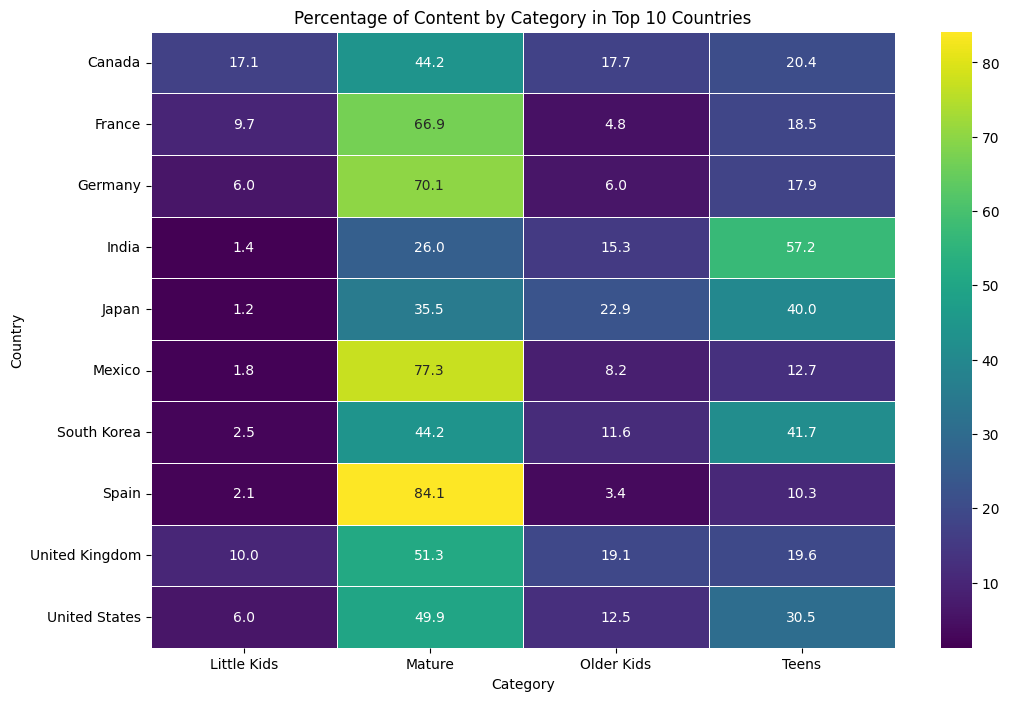

In [ ]:
top_10_countries = country_set['country'].value_counts().head(10).index.tolist()
df_top_10 = final_result[final_result['country'].isin(top_10_countries)]
pivot_df = df_top_10.pivot(index='country', columns='category', values='percentage')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap='viridis', linewidths=.5)
plt.title('Percentage of Content by Category in Top 10 Countries')
plt.xlabel('Category')
plt.ylabel('Country')
plt.show()


In [ ]:
rating_set= listed_in_set.copy()
rating_category_map = {
    'TV-Y': 'Little Kids',
    'TV-Y7': 'Older Kids',
    'TV-G': 'Little Kids',
    'TV-PG': 'Older Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature',
    'NC-17': 'Mature',
    'TV-MA': 'Mature',
    'NR': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Mature'
}
rating_set['category'] = rating_set['rating'].map(rating_category_map)
rating_set.shape

(19323, 15)

<ipython-input-163-3f4f17dcbc8e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rating', y='duration_int', data=avg_duration_per_rating, palette='coolwarm')


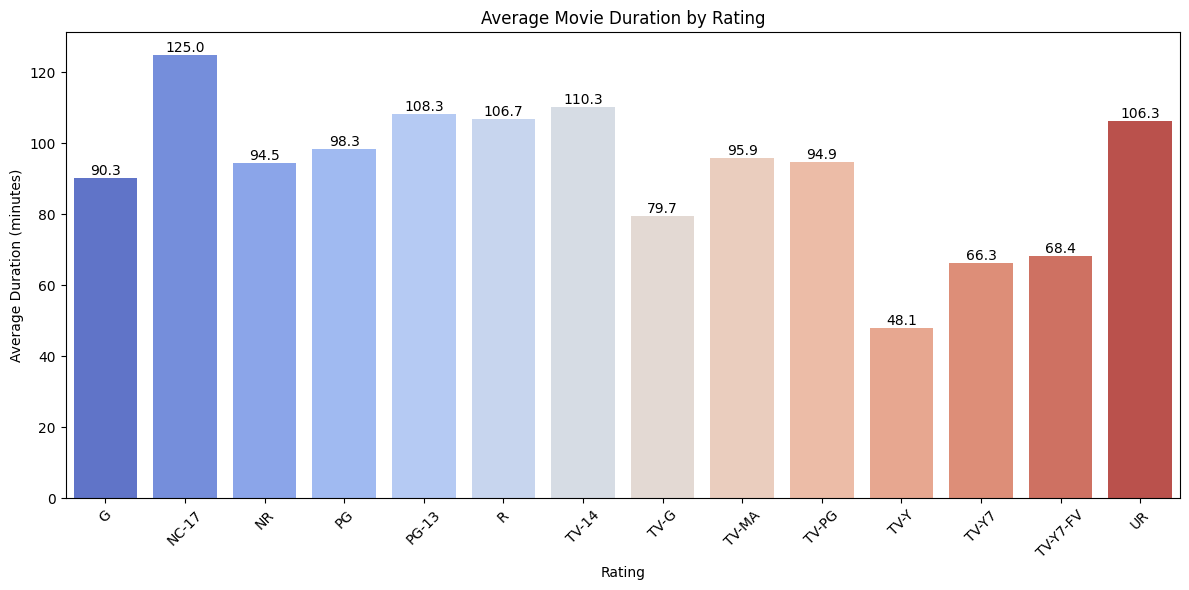

In [ ]:
n['duration_int'] = n.loc[n['type'] == 'Movie', 'duration'].str.replace(' min', '', regex=False).dropna().astype(int)
rating_set = n[n['type'] == 'Movie'][['rating', 'duration_int']]
rating_set.dropna(subset=['rating', 'duration_int'], inplace=True)
avg_duration_per_rating = rating_set.groupby('rating')['duration_int'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='rating', y='duration_int', data=avg_duration_per_rating, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

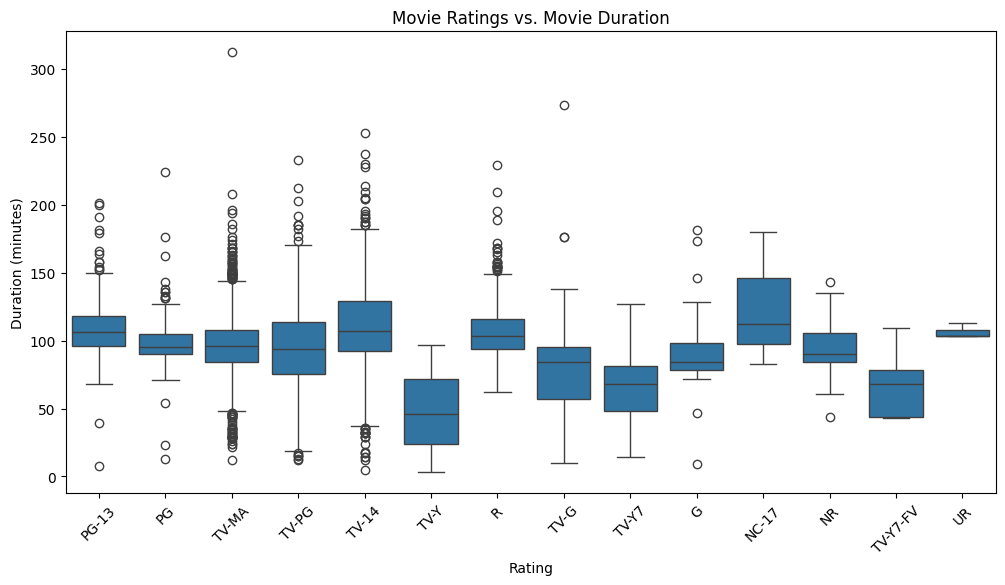

In [ ]:
n['duration_int'] = n.loc[n['type'] == 'Movie', 'duration'].str.replace(' min', '', regex=False).dropna().astype(int)
rating_set = n[n['type'] == 'Movie'][['rating', 'duration_int']]
rating_set.dropna(subset=['rating', 'duration_int'], inplace=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_int', data=rating_set)
plt.title('Movie Ratings vs. Movie Duration')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

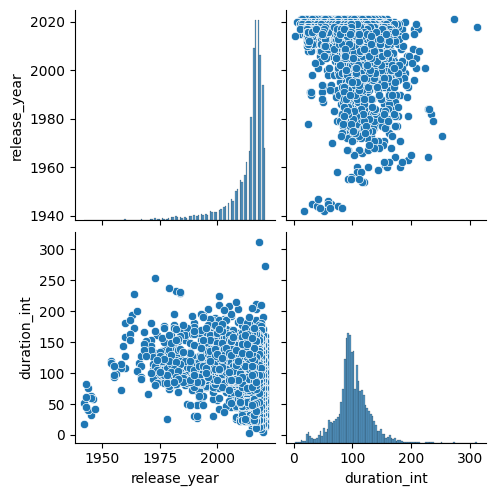

In [ ]:
movie_subset = n[n['type'] == 'Movie'][['release_year', 'duration_int']].dropna()
sns.pairplot(movie_subset)
plt.show()

In [ ]:
tv_duration = n.loc[n['type'] == 'TV Show', 'duration'].value_counts().reset_index()
tv_duration.columns = ['Season', 'Count']  # Rename columns appropriately
tv_duration.replace({
    '1 Season': '1S',
    '2 Seasons': '2S to 3S', '3 Seasons': '2S to 3S',
    '4 Seasons': '4S to 6S', '5 Seasons': '4S to 6S', '6 Seasons': '4S to 6S',
    '7 Seasons': '7S to 9S', '8 Seasons': '7S to 9S', '9 Seasons': '7S to 9S',
    '10 Seasons': '10S to 17S', '11 Seasons': '10S to 17S', '12 Seasons': '10S to 17S',
    '13 Seasons': '10S to 17S', '14 Seasons': '10S to 17S', '15 Seasons': '10S to 17S',
    '16 Seasons': '10S to 17S', '17 Seasons': '10S to 17S'
}, inplace=True)
tv_duration = tv_duration.groupby('Season')['Count'].sum().sort_values(ascending=False).reset_index()
print(tv_duration)

       Season  Count
0          1S   1793
1    2S to 3S    624
2    4S to 6S    193
3    7S to 9S     49
4  10S to 17S     17


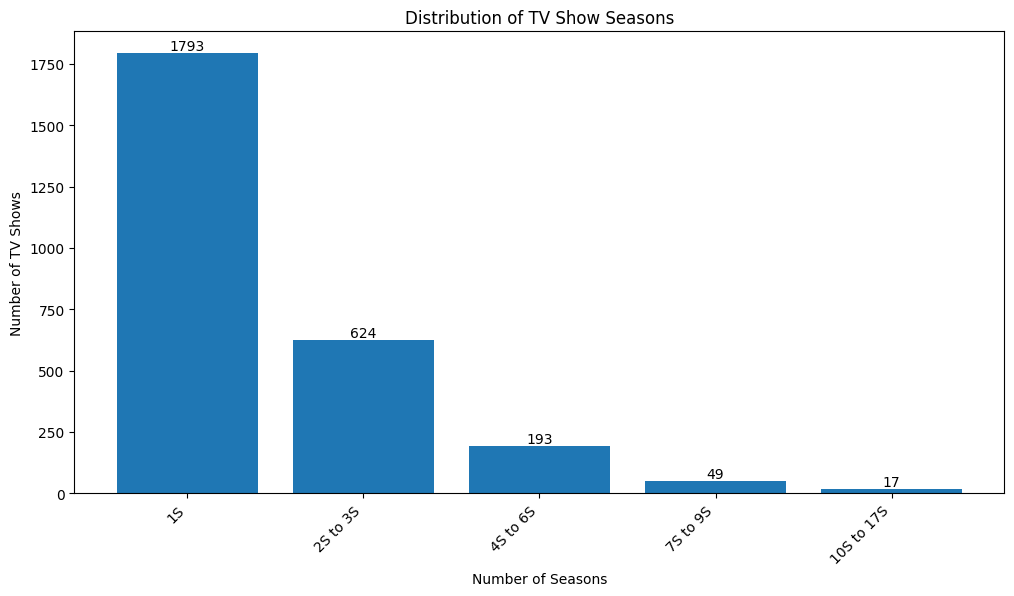

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(tv_duration['Season'], tv_duration['Count'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Show Seasons')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
movie_duration = n.loc[n['type'] == 'Movie', 'duration'].value_counts().reset_index()
movie_duration.columns = ['Duration', 'Count']
movie_duration['Duration'] = movie_duration['Duration'].str[:-3]
movie_duration['Duration'] = movie_duration['Duration'].astype('int')
bin_range = [0, 30, 90, 150, 210, float('inf')]
bin_labels = ['Short Films', 'Medium Films', 'Standard Films', 'Long Films', 'Epic Films']
movie_duration['Film Length'] = pd.cut(movie_duration['Duration'], bins=bin_range, labels=bin_labels)
movie_duration = movie_duration.groupby('Film Length')['Count'].sum().sort_values(ascending=False).reset_index()
print(movie_duration)

      Film Length  Count
0  Standard Films   3893
1    Medium Films   1860
2      Long Films    234
3     Short Films    130
4      Epic Films     11


<ipython-input-168-63c914c7f893>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_duration = movie_duration.groupby('Film Length')['Count'].sum().sort_values(ascending=False).reset_index()


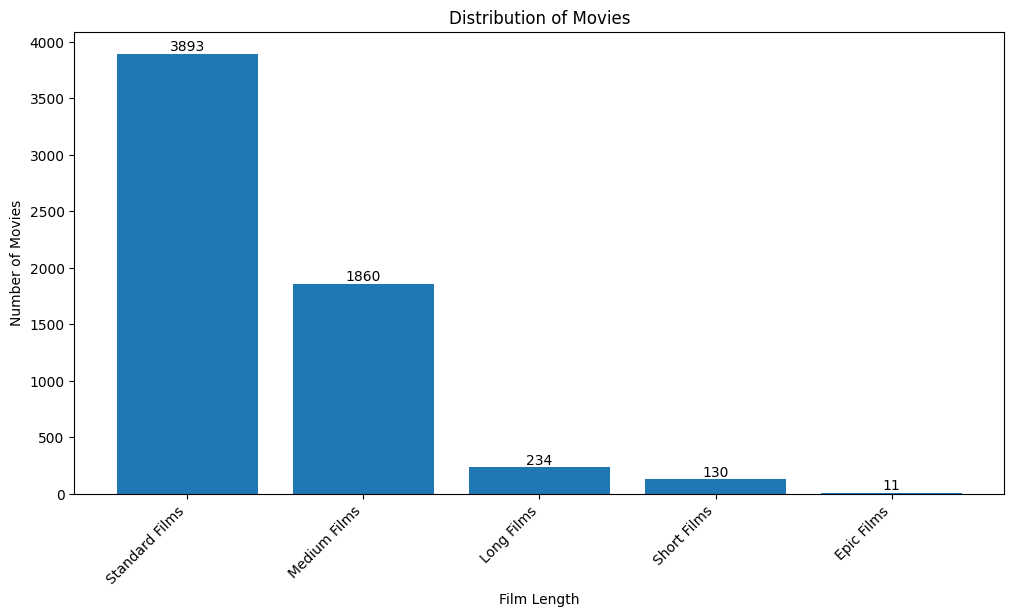

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(movie_duration['Film Length'], movie_duration['Count'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(yval), ha='center', va='bottom')
plt.xlabel('Film Length')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


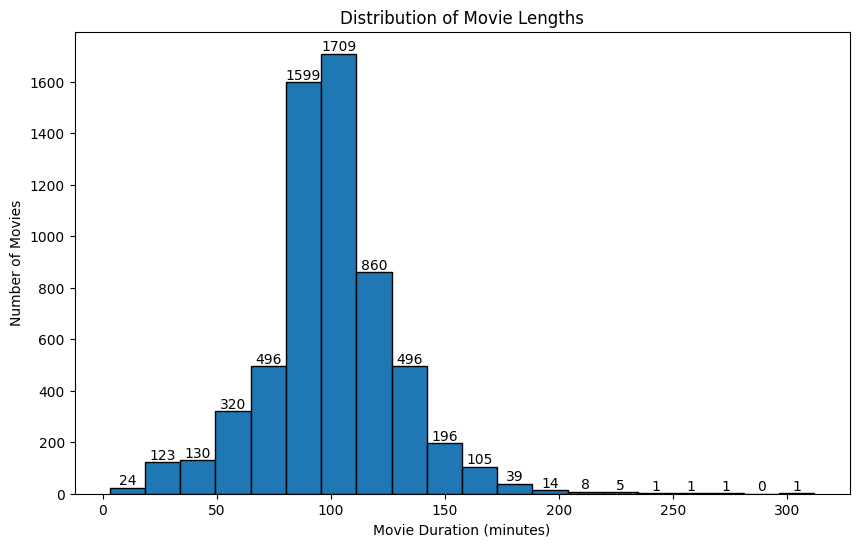

In [ ]:
movie_durations = n.loc[n['type'] == 'Movie', 'duration']
movie_durations = movie_durations.str.replace(' min', '', regex=False).dropna().astype(int)
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(movie_durations, bins=20, edgecolor='black')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
             ha='center', va='bottom')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Lengths')
plt.show()

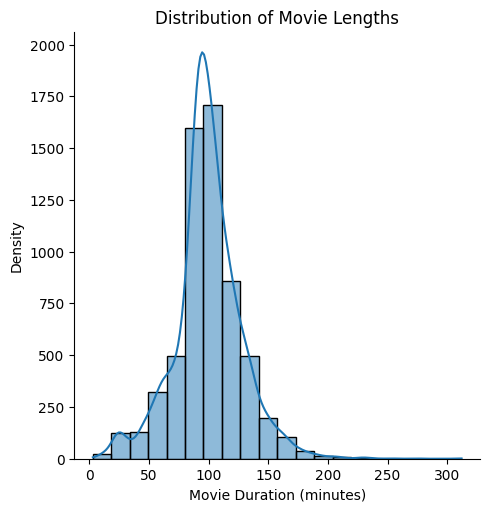

In [ ]:
sns.displot(movie_durations, kde=True, bins=20)
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Density')
plt.title('Distribution of Movie Lengths')
plt.show()

<ipython-input-172-eff333c54f19>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='type', y='duration_int', data=avg_duration_per_type, palette='coolwarm')


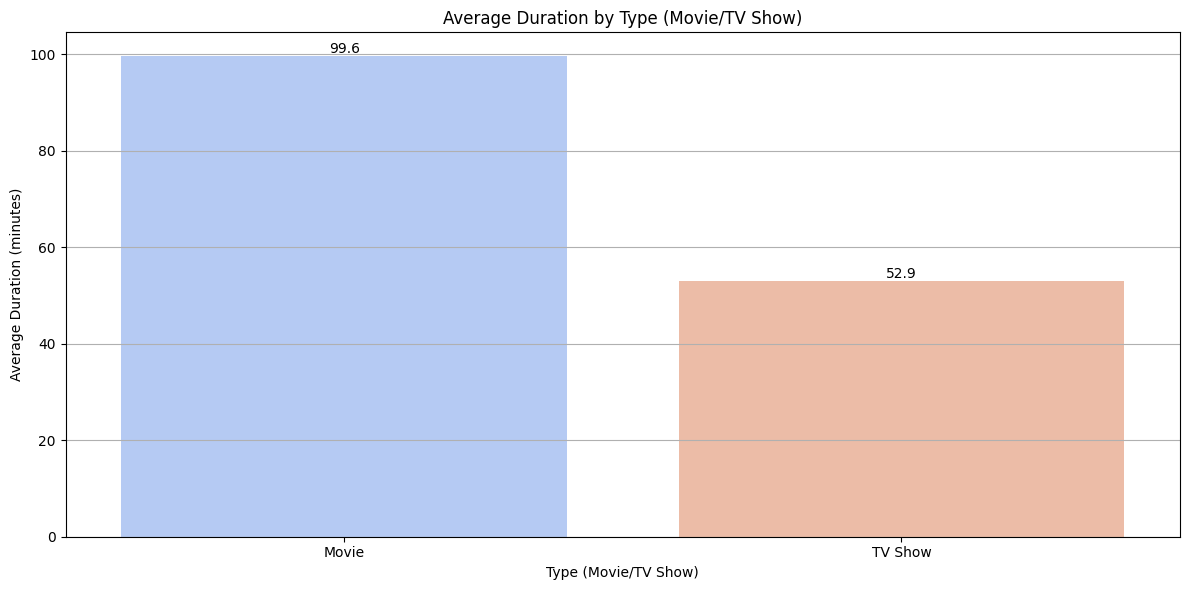

In [ ]:
def convert_duration(duration):
    if isinstance(duration, str):
        if 'min' in duration:
            return int(duration.replace(' min', ''))
        elif 'Season' in duration:
            return int(duration.split(' ')[0]) * 30  # Assuming each season is approx. 30 minutes
    return None
n['duration_int'] = n['duration'].apply(convert_duration)
rating_set = n[['type', 'duration_int']].dropna()
avg_duration_per_type = rating_set.groupby('type')['duration_int'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='type', y='duration_int', data=avg_duration_per_type, palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.title('Average Duration by Type (Movie/TV Show)')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Average Duration (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

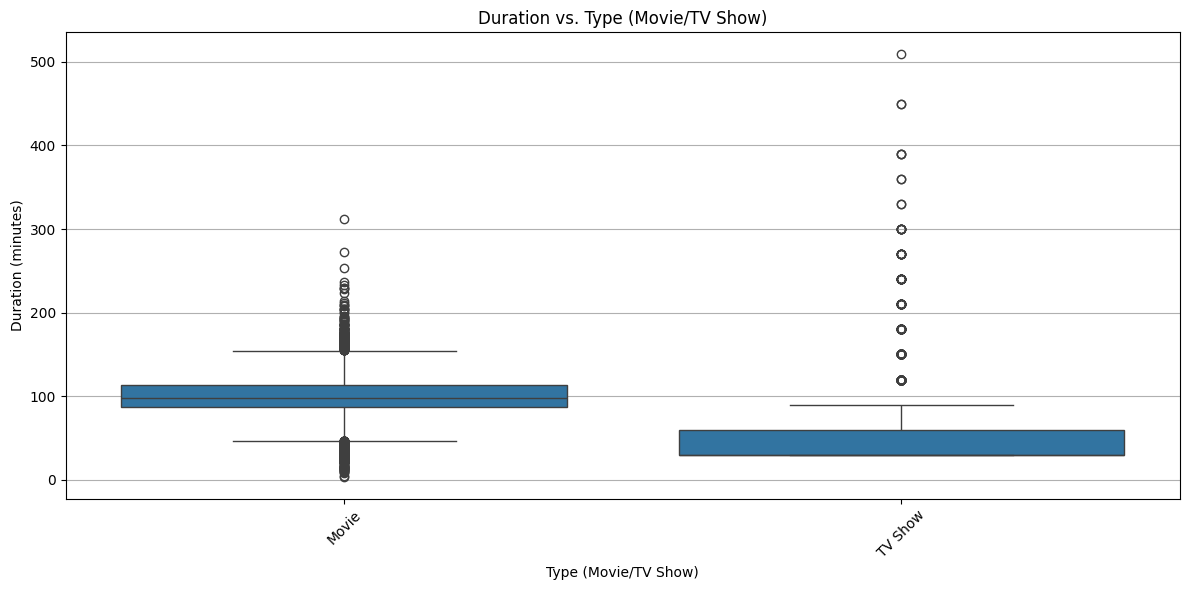

In [ ]:
def convert_duration(duration):
    if isinstance(duration, str):
        if 'min' in duration:
            return int(duration.replace(' min', ''))
        elif 'Season' in duration:
            return int(duration.split(' ')[0]) * 30  # Assuming each season is approximately 30 minutes
    return None
n['duration_int'] = n['duration'].apply(convert_duration)
rating_set = n[['type', 'duration_int']].dropna()
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='duration_int', data=rating_set)
plt.title('Duration vs. Type (Movie/TV Show)')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Business Insights:
*   Patterns in Data:
*   *   Movies dominate Netflix’s content (69.6% are movies, 30.4% are TV shows).
*   *   U.S. and India lead in content production (especially movies), while South Korea and Japan produce more TV shows.
*   *   A significant portion of TV shows have one season (67%), while most movies fall under standard-length films.
*   *   Genres: International content and dramas are dominant, with India and the U.S. producing the most.
*   *   Mature-rated content dominates, suggesting a gap in family-friendly programming.
*   *   International content and dramas are prevalent, with India producing the most international films and the U.S. excelling in dramas.
*   *   TV shows are growing, driven by the binge-watching trend, creating long-term engagement opportunities.
*   *   Underrepresented regions like Africa and Eastern Europe offer growth potential for localized content.
*   *   There's room to diversify genres and experiment with content length.


Recommendations :
*   *   Expand collaborations in key international markets (India, South Korea) for diverse TV content.
Focus on producing multi-season shows to boost viewer retention.
*   *   Invest in high-demand genres like dramas, international movies, and crime dramas for global audiences.
*   *   Increase kids and family content to balance mature ratings and attract younger viewers.
*   *   Leverage star power (e.g., Shah Rukh Khan) for exclusive Originals in key markets.
*   *   Optimize content release timing for peak engagement.
*   *   Produce varied movie lengths to suit different viewer preferences.
*   *   Localize marketing efforts in top content-producing regions.
*   *   Partner with emerging markets (Brazil, Spain, Mexico) for regional and global original content.






Comments on the range of attributes:
* The dataset contains 12 attributes, including show metadata like show_id, type, title, director, cast, country, release_year, and rating.
* Not all attributes have complete data, as columns such as director, cast, and country contain a notable amount of missing values.
* Most of the columns are of type object, with the exception of release_year, which is an integer.
* Attributes such as type (Movie or TV Show) and rating are categorical variables, while release_year is a numeric variable useful for temporal analysis.

Comments on the distribution of variables and relationships between them
* The release_year variable is well distributed across a wide range of years, peaking in recent years as expected for Netflix content.
* The rating distribution shows the dominance of TV-MA and TV-14 ratings, suggesting a prevalence of mature content.
* For TV shows, the duration represents the number of seasons, whereas for movies, it refers to runtime in minutes. This needs to be handled carefully for analysis.
* There is a significant difference in the content produced across countries, with the U.S. contributing the most.
* Bivariate analysis shows that most content is released in more recent years, with the U.S. producing the highest number of titles, especially movies.

Comments for each univariate and bivariate plot
* Univariate Plot (e.g., Movie Duration Distribution):
The histogram shows that most movies fall within the standard film range of 90–150 minutes, with very few short or epic-length films.
* Bivariate Plot (e.g., Number of Movies per Year): The line plot highlights a steady increase in the number of movies added each year, with a sharp rise in recent years, reflecting Netflix’s content expansion.
* Bar Plot of TV Show Seasons: TV shows tend to have 1 season, with a gradual drop in the count as the number of seasons increases, indicating that shorter TV series are more common.
* Pie Chart of Content Type: Movies make up a larger proportion of the total content compared to TV shows.
* Heatmap of Content by Category and Country: This visualization reveals that certain countries (e.g., the U.S. and India) focus on specific categories like dramas and international movies.